**=====================================================================**

# Project Statement:

**=====================================================================**

While searching for the dream house, the buyer looks at various factors, not just at the height of the basement ceiling or the proximity to an east-west railroad

Using the dataset, find the factors that influence price negotiations while buying a house.

There are **79 explanatory variables** describing every aspect of residential homes in Ames, Iowa.

**Perform the following steps:**
1.	Understand the dataset:

> a.	Identify the shape of the dataset

> b.	Identify variables with null values

> c.	Identify variables with unique values

2.	Generate a separate dataset for numerical and categorical variables


3.	EDA of numerical variables:

> a.	Missing value treatment

> b.	Identify the skewness and distribution

> c.	Identify significant variables using a correlation matrix 

> d.	Pair plot for distribution and density

4.	EDA of categorical variables

> a.	Missing value treatment

> b.	Count plot and box plot for bivariate analysis

> c.	Identify significant variables using p-values and Chi-Square values

5.	Combine all the significant categorical and numerical variables

6.	Plot box plot for the new dataset to find the variables with outliers

**Note**: *The last two points are performed to make the new dataset ready for training and prediction.*




**=====================================================================**

## The  author of this Notebook is Tyrone Oldham

**=====================================================================**

## Imports and Dataset

In [1]:
# perform all necessary library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.options.display.max_columns = None
pd.options.display.max_rows = 50
%matplotlib inline


In [2]:
house_data = pd.read_csv('PEP1.csv')

**=====================================================================**

## 1.	Understand the dataset:

**=====================================================================**

### <u>1a. Identify the head & shape of the dataset</u>

In [3]:
#Display frist 3 rows from data set
house_data.head(3)                   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,KitchenQual,TotRmsAbvGrd,Functiol,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
#Identify the shape of the dataset
house_data.shape

(1460, 81)

<span style="color:magenta">**Of the 81 columns, 1 is the "Id", 1 is the dependent variable "SalePrice", and the remaining 79 are the independent variables that influence SalePrice.**</span>

In [5]:
#Identify columns/variables with null values
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<span style="color:magenta">**SUMMARY**: The dataset has **1460 rows of data, spanning across 81 columns**. Each row is a housing data record, with an **Id column** as the unique identifier, 79 other columns containing independent features and metadata about a house, followed by a **SalePrice** the target column that indicates the final selling price.</span>


### <u>1b. Identify columns-variables with null values</u>

#### • Identify sparsely populated <u>*columns that may need*</u> to be droped

In [6]:
null_stats = pd.DataFrame(house_data.isnull().sum(), columns=['missing_value_count'])
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / house_data.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)

,missing_value_count,% of dataset
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


<span style="color:magenta">**SUMMARY**: Of the 1460 rows of data there are multiple <u>**COLUMNS**</u>, 19 colomns, that contains 1 or more null or missijng values.</span>

<span style="color:magenta">Out of the 19 columns containing missing data, only 1 column Electrical	that has 1 row with a missing value, while PoolQC column has 1453 rows with missing values.</span>

<span style="color:magenta">Thus the COLUMNS with over 80% of the rows containing null or missijng values are PoolQC, MiscFeature, Alley and Fence. These feature columns will be dropped, along with the Id column.</span>

#### • Drop sparsely populated columns (Thresh hold here at %80)

In [7]:
#drop sparely populated column akong with id
house_data.drop(columns=['Id','Alley', 'PoolQC', 'MiscFeature', 'Fence'], inplace=True)

In [8]:
#check after dropping 
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

<span style="color:magenta">**SUMMARY**: After droping PoolQC, MiscFeature, Alley and Fence columns there still remains 14 columns with non-null or missijng values. We will deal with these <u>**ROWS**</u> later</span>


### <u>1c. Identify variables with unique values</u>

#### This is useful for categorical features.
- It is good to know when converting category into numerical values. Having many unique values may imcrease complexity when encoding & model creatation.
- It is good to know when creating bar and pie charts for a particular feature.
- It is good to know when dealing with certain descrete numerical values. Having a few descrete values can be converted to a few categorigal values

Below are three for loops used to show unique values.

#### • First For-Loop that identifies categorical unique values

In [9]:
#create Dataset for categorical variables to use in loop
categoryCols = house_data.select_dtypes('object').columns
number_df = house_data.select_dtypes('number')

#for loop
for column in categoryCols:
     #print('Name: ' + column)
     print(house_data[column].value_counts(dropna=False))
     print('-------------------\n')
    


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-------------------

Pave    1454
Grvl       6
Name: Street, dtype: int64
-------------------

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-------------------

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-------------------

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
-------------------

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-------------------

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
-------------------

mes        225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Bl

#### • Second For-Loop that identifies the count of numerical unique values

In [10]:
for col in number_df:
    print('{} column has {} unique values'.format(col,house_data[col].nunique()))

MSSubClass column has 15 unique values
LotFrontage column has 110 unique values
LotArea column has 1073 unique values
OverallQual column has 10 unique values
OverallCond column has 9 unique values
YearBuilt column has 112 unique values
YearRemodAdd column has 61 unique values
MasVnrArea column has 327 unique values
BsmtFinSF1 column has 637 unique values
BsmtFinSF2 column has 144 unique values
BsmtUnfSF column has 780 unique values
TotalBsmtSF column has 721 unique values
1stFlrSF column has 753 unique values
2ndFlrSF column has 417 unique values
LowQualFinSF column has 24 unique values
GrLivArea column has 861 unique values
BsmtFullBath column has 4 unique values
BsmtHalfBath column has 3 unique values
FullBath column has 4 unique values
HalfBath column has 3 unique values
BedroomAbvGr column has 8 unique values
KitchebvGr column has 4 unique values
TotRmsAbvGrd column has 12 unique values
Fireplaces column has 4 unique values
GarageYrBlt column has 97 unique values
GarageCars column 

<span style="color:magenta">**SUMMARY NUMERIC**: Unique numeric - there are multiple columns with 12 or less unique values.  Maybe these can be changed to categorical features instead of numeric.</span>


#### • Third For-Loop that identifies the count of categorical unique values

In [11]:
for col in categoryCols:
    print('{} column has {} unique values'.format(col,house_data[col].nunique()))

MSZoning column has 5 unique values
Street column has 2 unique values
LotShape column has 4 unique values
LandContour column has 4 unique values
Utilities column has 2 unique values
LotConfig column has 5 unique values
LandSlope column has 3 unique values
Neighborhood column has 25 unique values
Condition1 column has 9 unique values
Condition2 column has 8 unique values
BldgType column has 5 unique values
HouseStyle column has 8 unique values
RoofStyle column has 6 unique values
RoofMatl column has 8 unique values
Exterior1st column has 15 unique values
Exterior2nd column has 16 unique values
MasVnrType column has 4 unique values
ExterQual column has 4 unique values
ExterCond column has 5 unique values
Foundation column has 6 unique values
BsmtQual column has 4 unique values
BsmtCond column has 4 unique values
BsmtExposure column has 4 unique values
BsmtFinType1 column has 6 unique values
BsmtFinType2 column has 6 unique values
Heating column has 6 unique values
HeatingQC column has 5 

<span style="color:magenta">**SUMMARY**:The unique values for categorigal numeric feature are displayed above. Discovery shows that **exterior1st** and **exterior2nd** and **neighborhood** feature columns have many unique values. These may imcrease complexity when encoding these categories into numerical values and creating a model.</span>


**=====================================================================**

## 2.	Generate datasets numerical & categorical var
These separate dataset will be used for EDA on numerical values then EDA on categorical variables respectively.

**=====================================================================**

### <u>2a Generate Dataset for numerical variables</u>

#### • Generate Dataset & Check head

In [12]:
#Dataset for numerical variables number
number_df = house_data.select_dtypes('number')
number_df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


#### • Check Shape & Verify data types

In [13]:
# Check shape
number_df.shape

(1460, 37)

In [14]:
# Verify data types in number_df.info.()
number_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

#### <span style="color:magenta">SUMMARY: The numerical dataset contains <u>37 feature columns</u> with a small, few having missing values.</span>

### <u>2b Generate Dataset for categorical variables</u>

#### • Generate Dataset & Check head

In [15]:
#Dataset for categorical variables object
category_df = house_data.select_dtypes('object')
category_df.head(3)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


#### • Check Shape & Verify data types

In [16]:
category_df.shape

(1460, 39)

In [17]:
# Verify data type category_df.info.()
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

#### <span style="color:magenta">SUMMARY: The categorical dataset contains <u>39 feature columns</u> having some missing values.</span>

**=====================================================================**

### <u>2c Generate a categorical target column from SalePrice</u>

SalePrice is the target value of number_df 

**=====================================================================**

#### Follow these steps to <u>BIN</u> and create a target categorical column

- Determine approx number of bins by looking at SalePrice distribution from numerical Dataframe
- Bin: create a label list & bin categrical dependent colunn from SalePrice column
- Count/display bins of this newly created dependent categorigal column

**=====================================================================**

####  •	Determine approx number of bins by looking at SalePrice distribution from numerical DataFrame

Creatie a categrical dependent colunn from numerical SalePrice dependent colunn*

<AxesSubplot:>

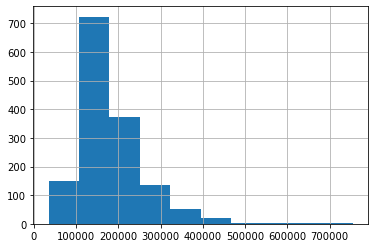

In [18]:
number_df['SalePrice'].hist()

<span style="color:magenta">**From the above histogram seems like 7 bins will be appropiate.**</span>

#### •  Bin: create a label list & bin categrical dependent colunn from SalePrice column 

In [19]:
# Create labels for bins
labels = ['Standard', 'StandardPlus', 'Premium', ' PremiumPlus', 'Platinum', ' PlatinumPlus', 'Diamond']


In [20]:
# Create priceLevel dependent colunn from SalePrice with.cut
category_df['priceLevel'] = pd.cut(number_df.SalePrice, bins = 7, labels= labels)

#### •	Count/display bins of this newly created dependent categorigal column

In [21]:
# Get value count
category_df['priceLevel'].value_counts()

StandardPlus     751
Standard         464
Premium          186
 PremiumPlus      45
Platinum           7
 PlatinumPlus      5
Diamond            2
Name: priceLevel, dtype: int64

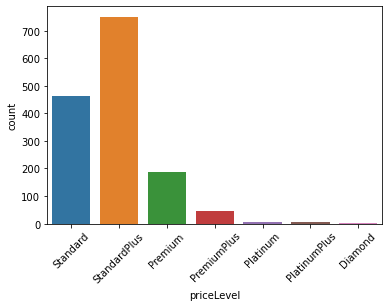

In [22]:
ax = sns.countplot(x='priceLevel', data= category_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.figure
plt.show()

In [23]:
category_df.head(3)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,priceLevel
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,StandardPlus
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,StandardPlus
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,StandardPlus


<span style="color:magenta">**NOTE: <u>priceLevel</u> a categorigal target column is created which may be helpful when preforming chi-2 categorogal to categorigal feature selection later.**</span>

**=====================================================================**

## 3.	EDA of numerical variables:

**=====================================================================**

### <u>3a1. Missing value treatment (Identify)<u>

#### • Identify columns with missing values as True or False

In [24]:
number_df.isnull().any()

MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchebvGr       False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

#### • Identify columns with missing values as a sum

In [25]:
number_df.isnull().sum()


MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [26]:
number_df.shape

(1460, 37)

#### • Idemtify the total number of columns with missing values

In [27]:
number_df.isnull().any().sum()

3

### <u>3a2. Missing value treatment (Action)</u>

**PROCESS**: In the number_df DataFrame there are three columns with rows containing missing or null values. **<u>LotFrontage**</u> missing 259 values,  **<u>GarageYr+Blt**</u> missing 81  and **<u>MasVnrArea**</u> missing only 8.  
- Because the number of rows are relatively small in MasVnrArea(8) I will drop these rows.
- Then in GarageYrBlt(81) and LotFrontage(259), I will replace these values with their median, because these amounts may be singnificant.


#### Dropping MasVnrArea 8 null records¶

In [28]:
#Drop the 8  missing values in MasVnrArea
number_df.dropna(subset=['MasVnrArea'], inplace=True)

#### Replacing GarageYrBlt 81 null values with median

In [29]:
#Get the median to replace 81 GarageYrBlt missing values.
number_df['GarageYrBlt'].median()

1980.0

In [30]:
print('GarageYrBlt median: {}'.format(np.round(number_df['GarageYrBlt'].median(), 0)))

GarageYrBlt median: 1980.0


In [31]:
#Replace the 81 GarageYrBlt missing values with median
print('GarageYrBlt median: {}'.format(np.round(number_df['GarageYrBlt'].median(), 0)))

number_df.fillna(value=number_df['GarageYrBlt'].median(),inplace=True)
# number_df['GarageYrBlt'].fillna(value=1980.0,inplace=True)

GarageYrBlt median: 1980.0


#### Replacing LotFrontage 259 null values with median

In [32]:
#Replace the 259 LotFrontage missing values with median
print('Lot Frontage median: {}'.format(np.round(number_df['LotFrontage'].median(), 0)))

number_df.fillna(value=number_df['LotFrontage'].median(),inplace=True)

Lot Frontage median: 74.0


In [33]:
number_df.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

<span style="color:magenta">**NOW number_df does not have any missing values.**</span>

### <u>3b. Identify the skewness and distribution</u>

**Information About Skewness**

- **Right skew** (positive skew). A distribution is longer on right side of its peak than on its left; mean > median > mode.
- **Left skew** (negative skew). A distribution is longer on left side of its peak than on its right; mean < median < mode.
- **Zero (no) skew**. mean = median = mode (does not exist).

**If skewness < -1 or skewness >-1 the distribution is highly skewed.**

#### • Identify skewness

In [34]:
#identify skewness of coumns
number_df.skew(axis=0, skipna=True).sort_values(ascending=False)

MiscVal          24.409889
PoolArea         14.787221
LotArea          12.240033
3SsnPorch        10.275369
LowQualFinSF      8.985769
KitchebvGr        4.514591
BsmtFinSF2        4.241902
ScreenPorch       4.109058
BsmtHalfBath      4.090233
EnclosedPorch     3.095363
MasVnrArea        2.669084
OpenPorchSF       2.385725
SalePrice         1.884045
BsmtFinSF1        1.702885
LotFrontage       1.690822
WoodDeckSF        1.542306
TotalBsmtSF       1.533040
MSSubClass        1.407336
GrLivArea         1.374375
1stFlrSF          1.373395
BsmtUnfSF         0.920938
2ndFlrSF          0.814485
OverallCond       0.694929
HalfBath          0.683031
TotRmsAbvGrd      0.680438
Fireplaces        0.648734
BsmtFullBath      0.605294
BedroomAbvGr      0.217581
OverallQual       0.214636
MoSold            0.210208
GarageArea        0.183300
YrSold            0.095878
FullBath          0.036446
GarageCars       -0.338128
YearRemodAdd     -0.497281
YearBuilt        -0.608915
GarageYrBlt      -0.673364
d

<span style="color:magenta">**SUMMARY**: Over half of the features, 20 of 37, in the number_df dataset are highly positive skewed, the data leans to left. Such values need to be treated before running the regression model.</span>

**<span style="color:magenta">These values can be treated with Log transformation method and or Box=Cox transformation which is beyond the scope of this Project.</span>**

#### • Distribution - histograms

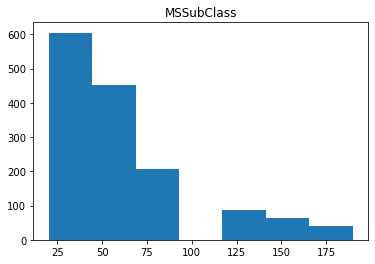

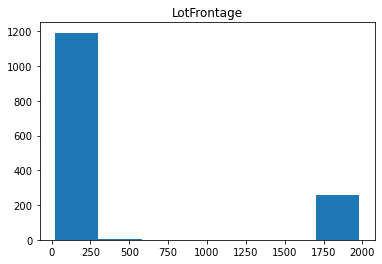

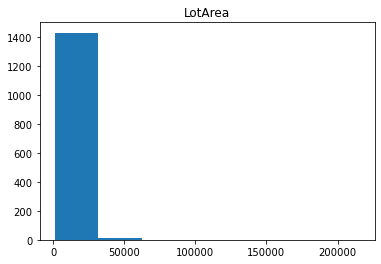

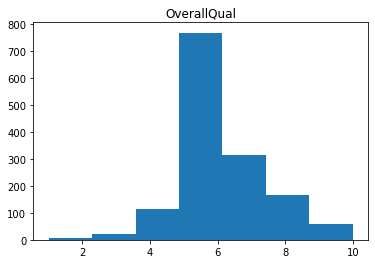

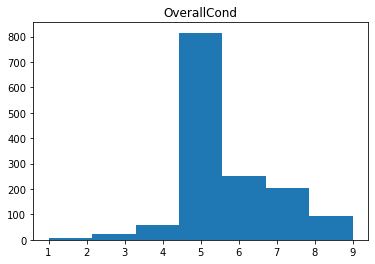

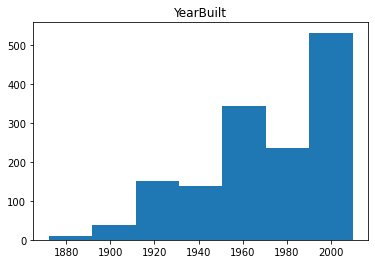

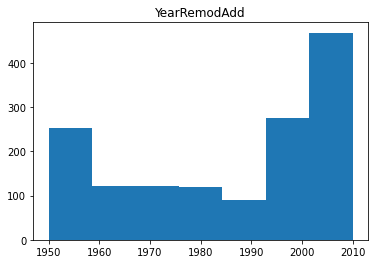

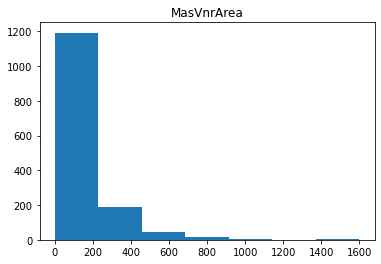

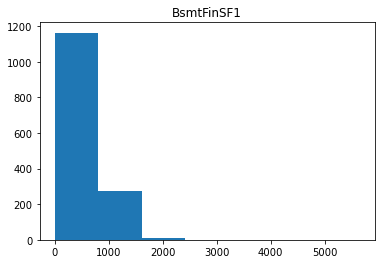

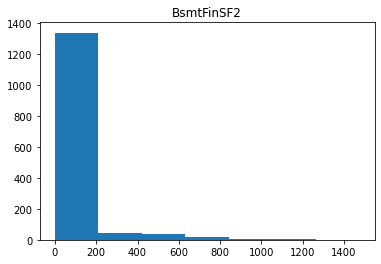

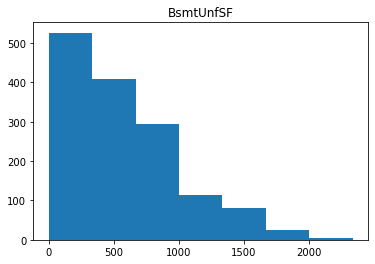

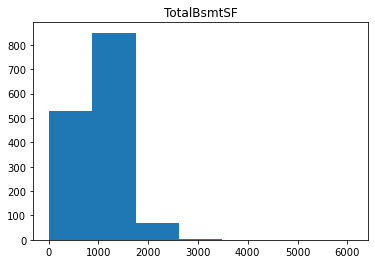

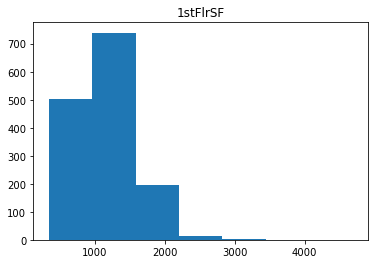

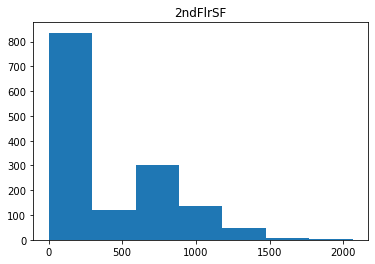

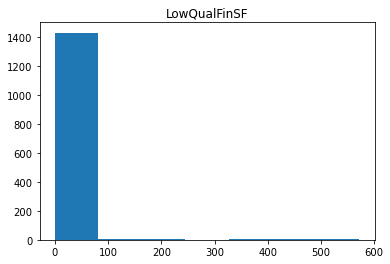

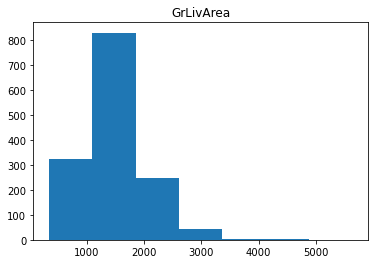

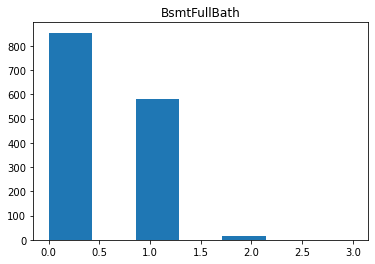

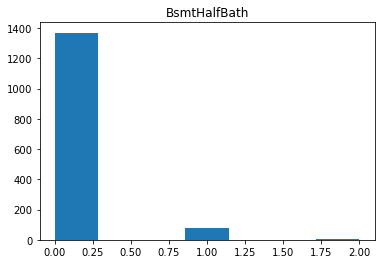

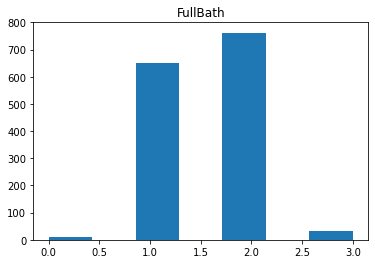

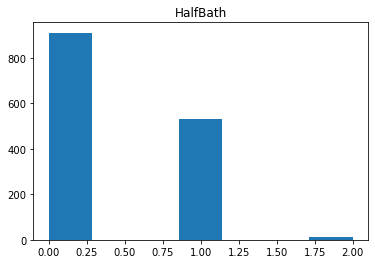

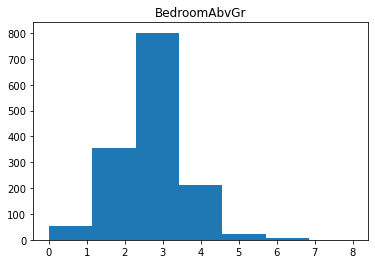

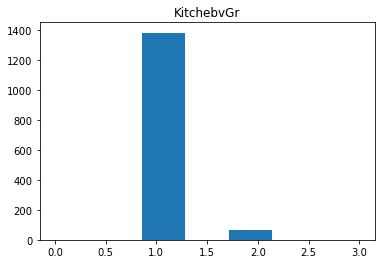

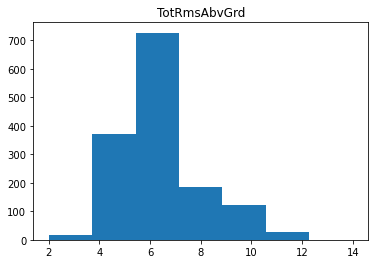

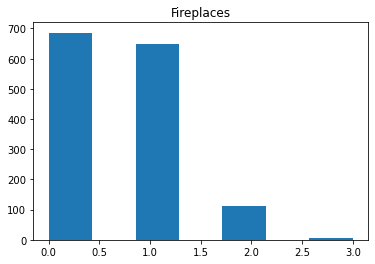

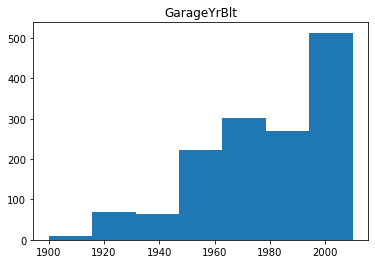

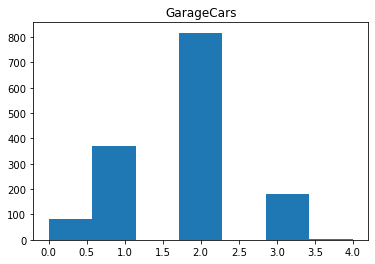

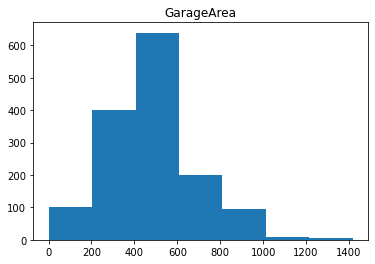

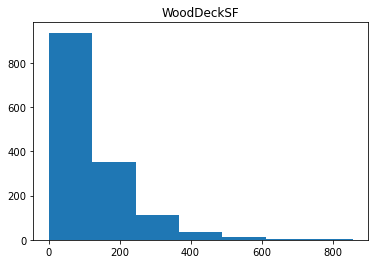

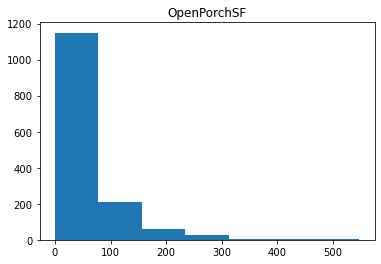

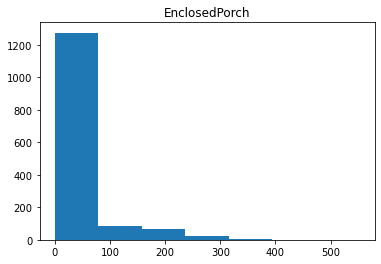

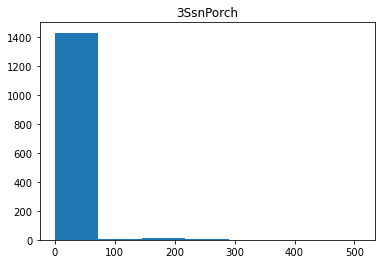

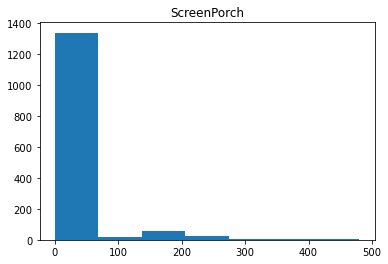

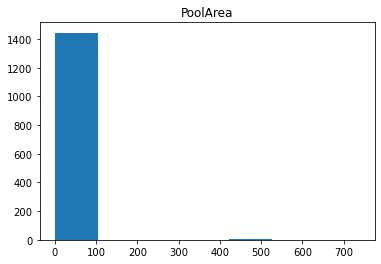

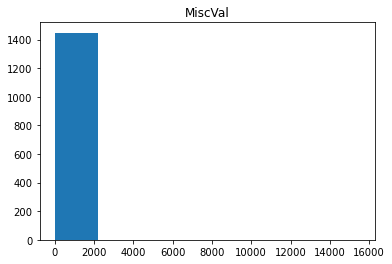

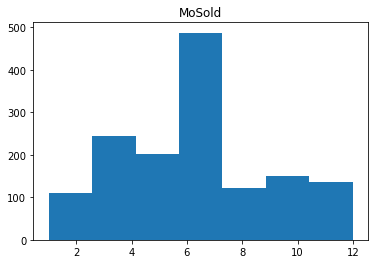

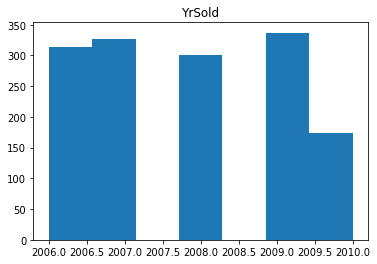

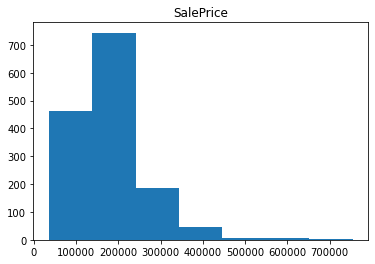

In [35]:
# For loop to plot histograms
varColumns2 = number_df.columns
for col in varColumns2:
    plt.hist(number_df[col], bins=7)
    plt.title(col)
    plt.show()


In [36]:
varColumns2 = number_df.columns

In [37]:
## Define a function to plot  histograms of numeric column:
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.histplot(data=dataframe, bins=7, x=column, ax=ax[i])
        ax[i].set_title('Distribution of \'' + column + '\' values', fontsize=12)
        plt.setp(ax[i].get_xticklabels(), rotation=90, fontsize=10) # smaller font for x-tick
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
    if len(list_of_columns) < nrows*ncols:
        for i in range(nrows*ncols - len(list_of_columns)):
            ax[nrows*ncols - 1 - i].set_axis_off() # get rid of empty subplots if they are present
    fig.tight_layout()

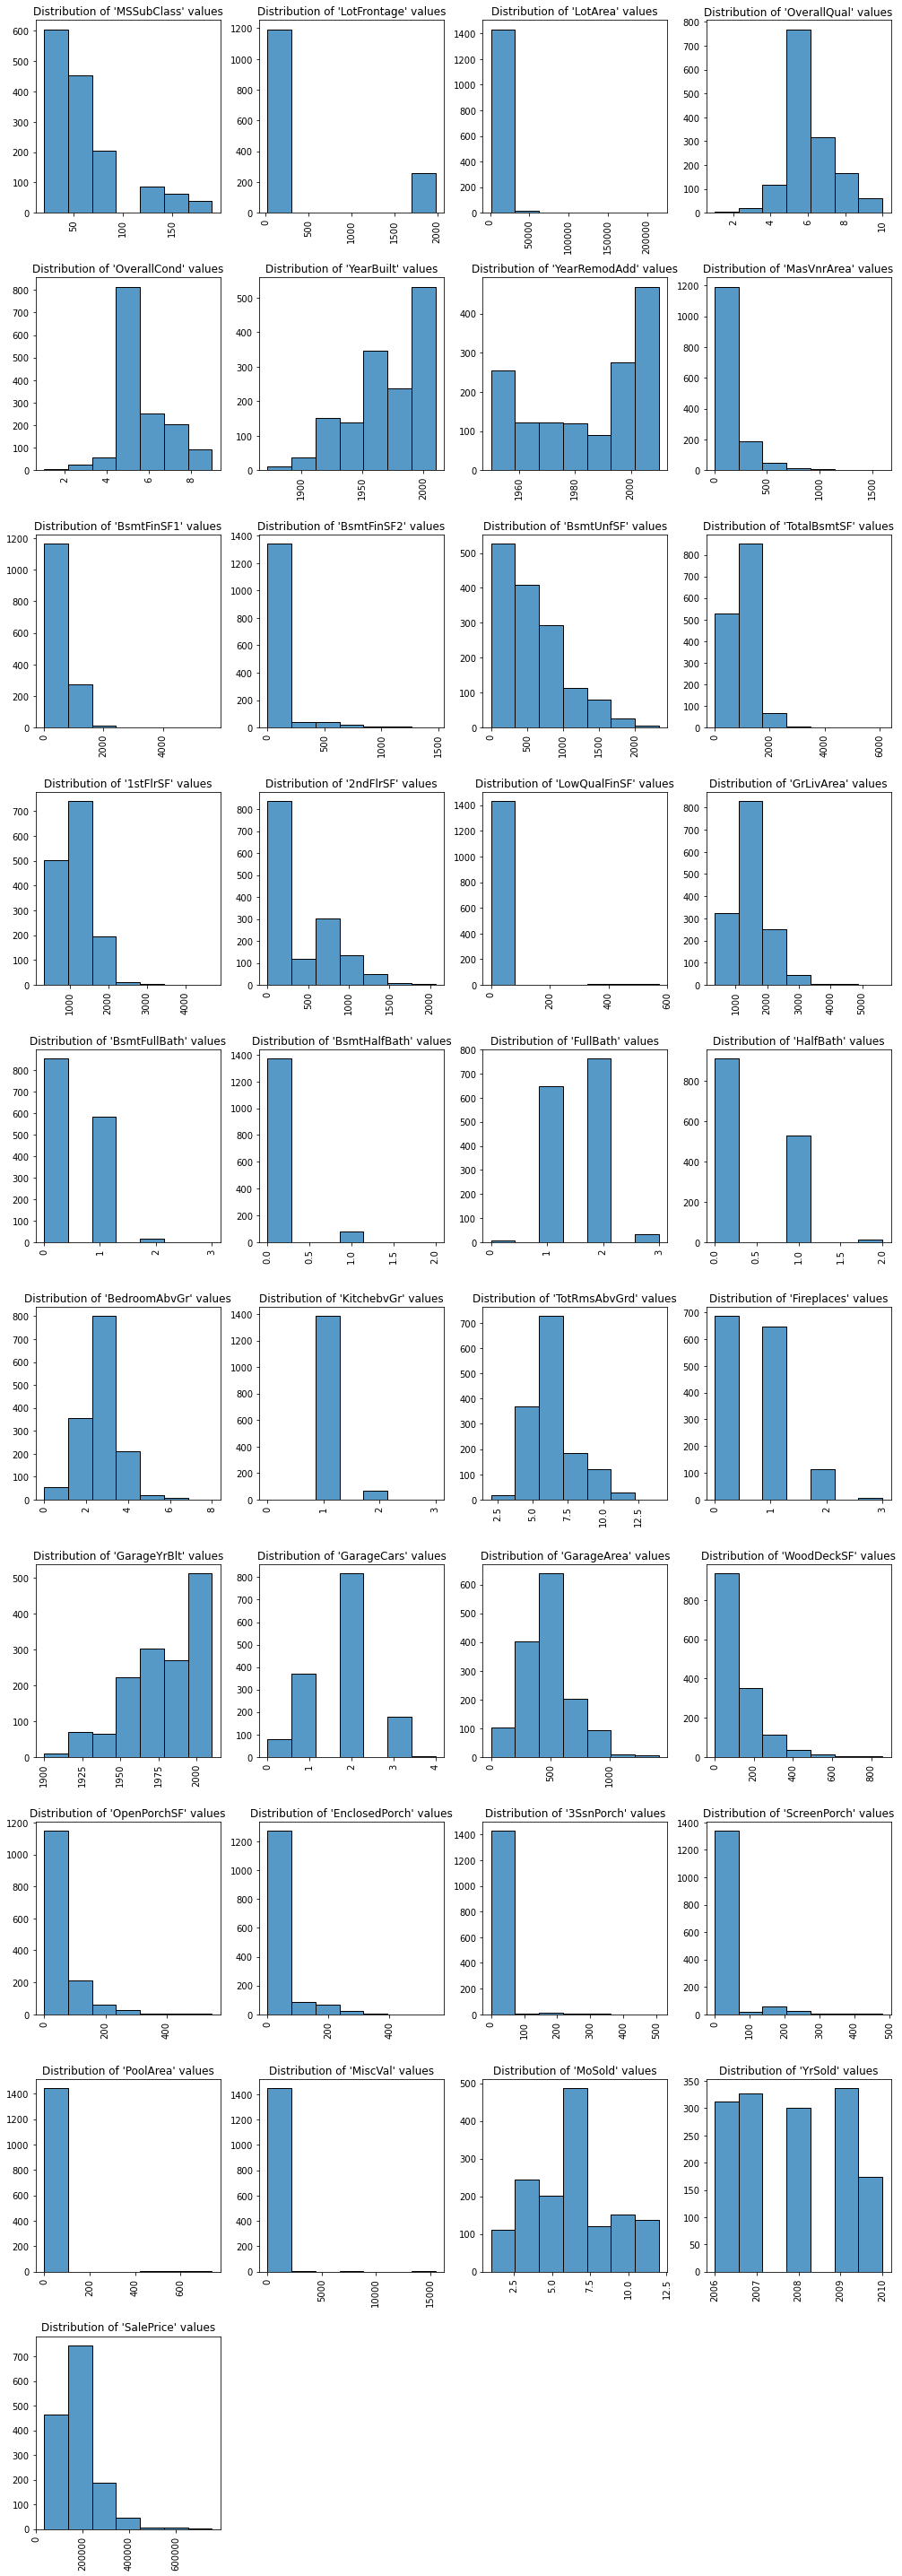

In [38]:
# Run subplot_histograms function
subplot_histograms(number_df, varColumns2)

C:\Users\Tyrone\AppData\Local\Temp\ipykernel_70712\1609714584.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


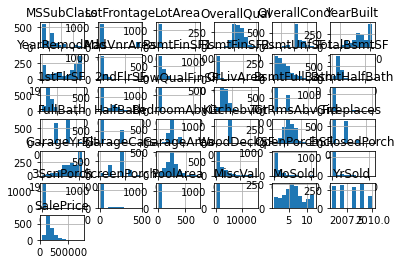

In [39]:
# Quick view of histograms
number_df.hist()
plt.tight_layout()
plt.show()

<span style="color:magenta">**SUMMARY**: The Histograms above display the various center, spread, and shape of the data.  The various distributions range from being Symmetric, Skewed, Uniform, Unimodal, and Bimodal.</span>

#### • Distibution - box plots

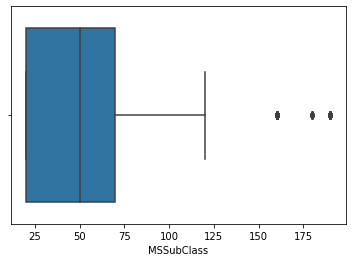

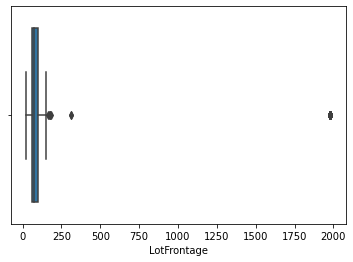

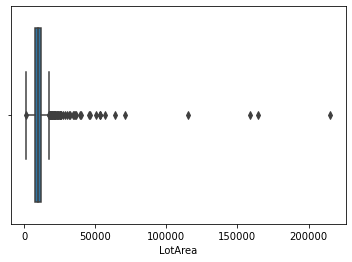

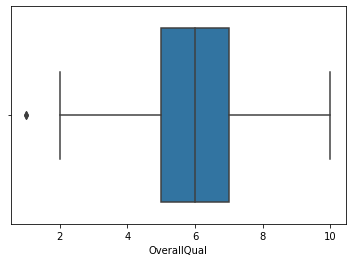

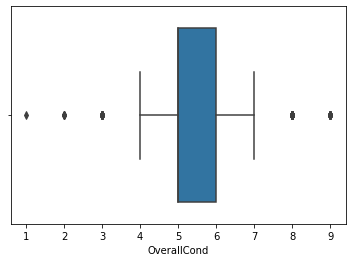

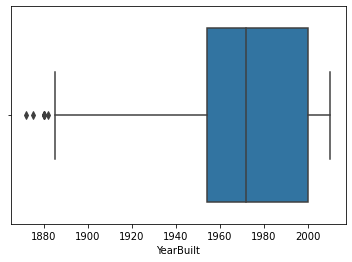

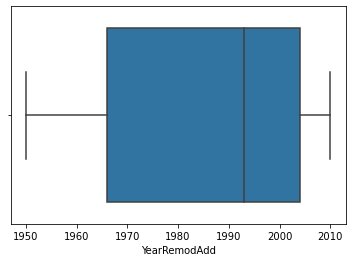

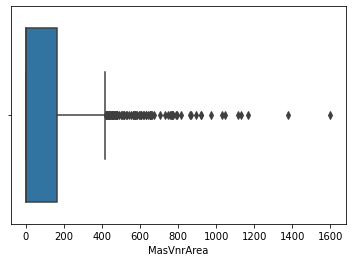

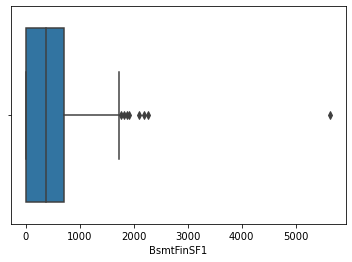

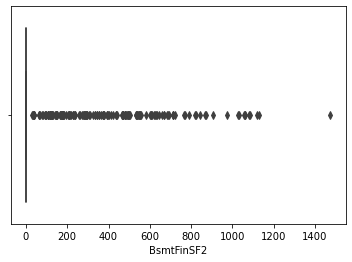

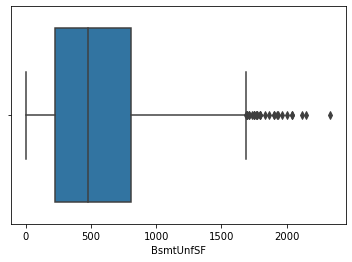

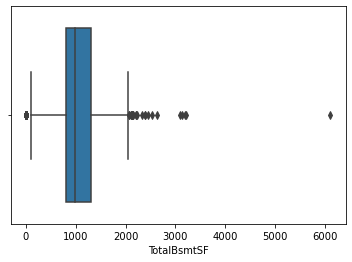

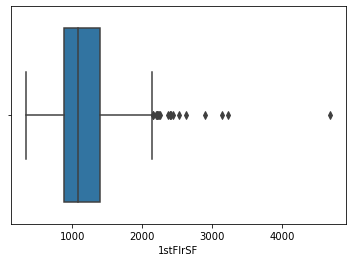

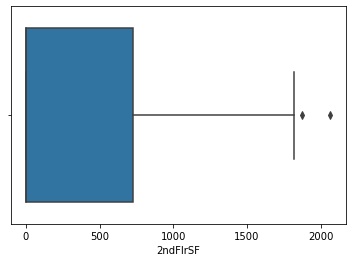

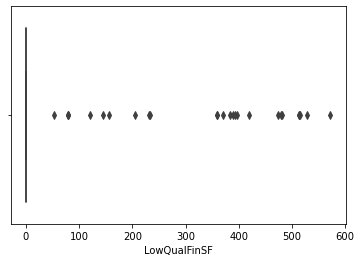

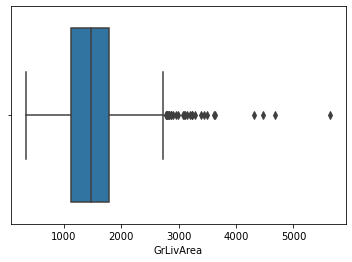

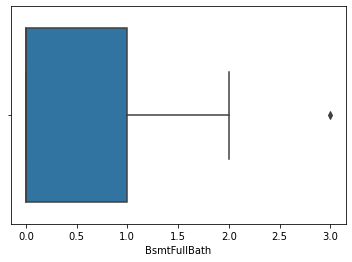

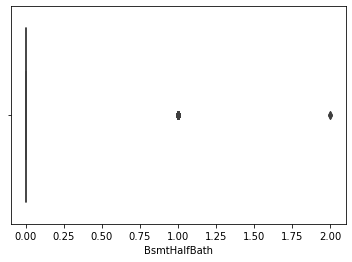

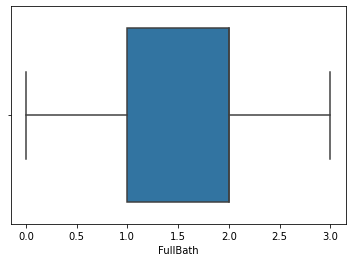

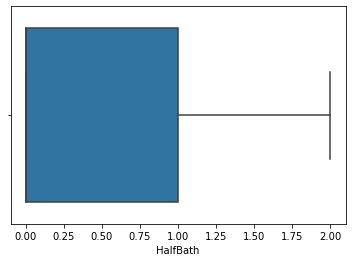

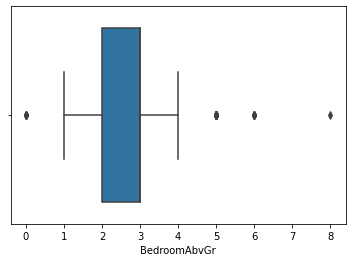

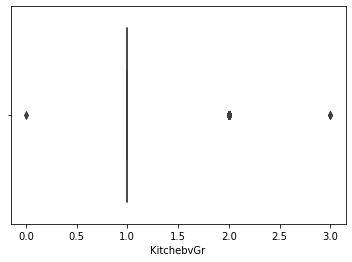

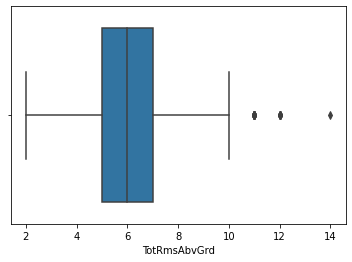

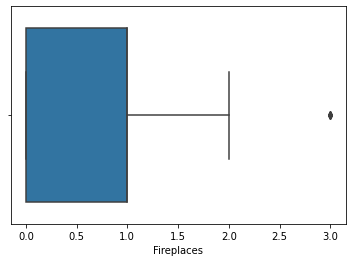

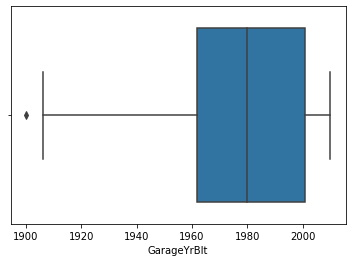

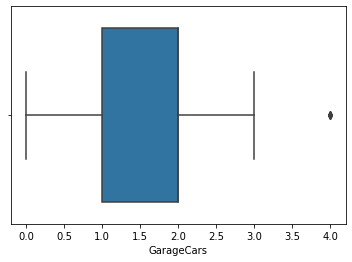

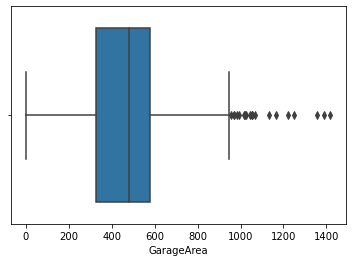

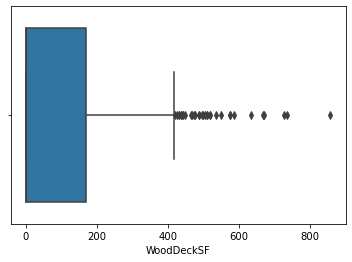

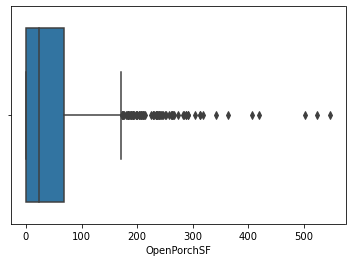

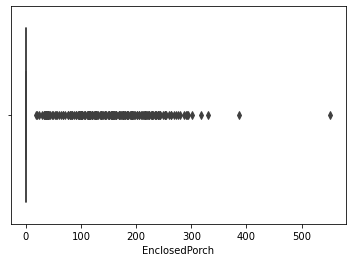

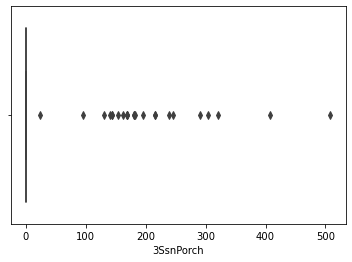

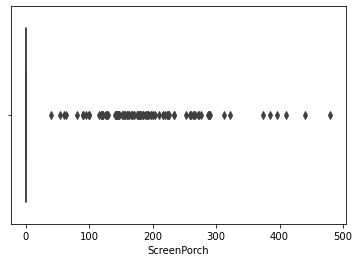

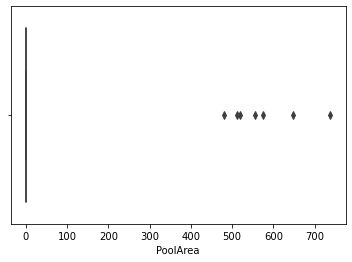

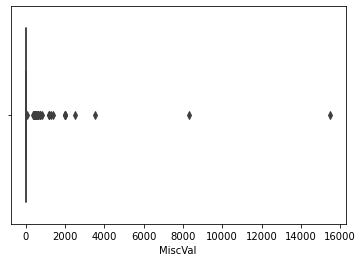

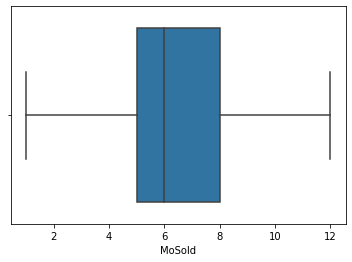

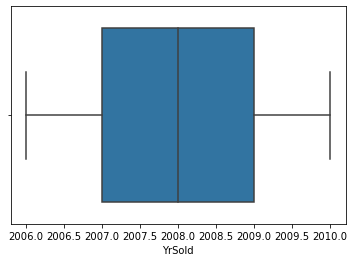

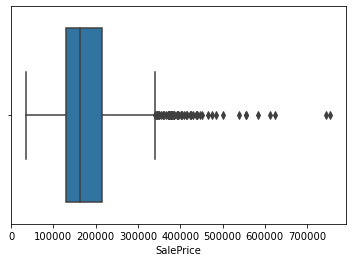

In [40]:
# For loop to plot boxplots
varColumns2 = number_df.columns
for col in varColumns2:
    sns.boxplot(x=number_df[col])
    plt.show()

In [41]:
## Define a function to make boxplots of numeric column:
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.boxplot(data=dataframe,x=number_df[column], ax=ax[i])
        ax[i].set_title('Distribution of \'' + column + '\' values', fontsize=12)
        plt.setp(ax[i].get_xticklabels(), rotation=90, fontsize=10) # smaller font for x-tick
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
    if len(list_of_columns) < nrows*ncols:
        for i in range(nrows*ncols - len(list_of_columns)):
            ax[nrows*ncols - 1 - i].set_axis_off() # get rid of empty subplots if they are present
    fig.tight_layout()

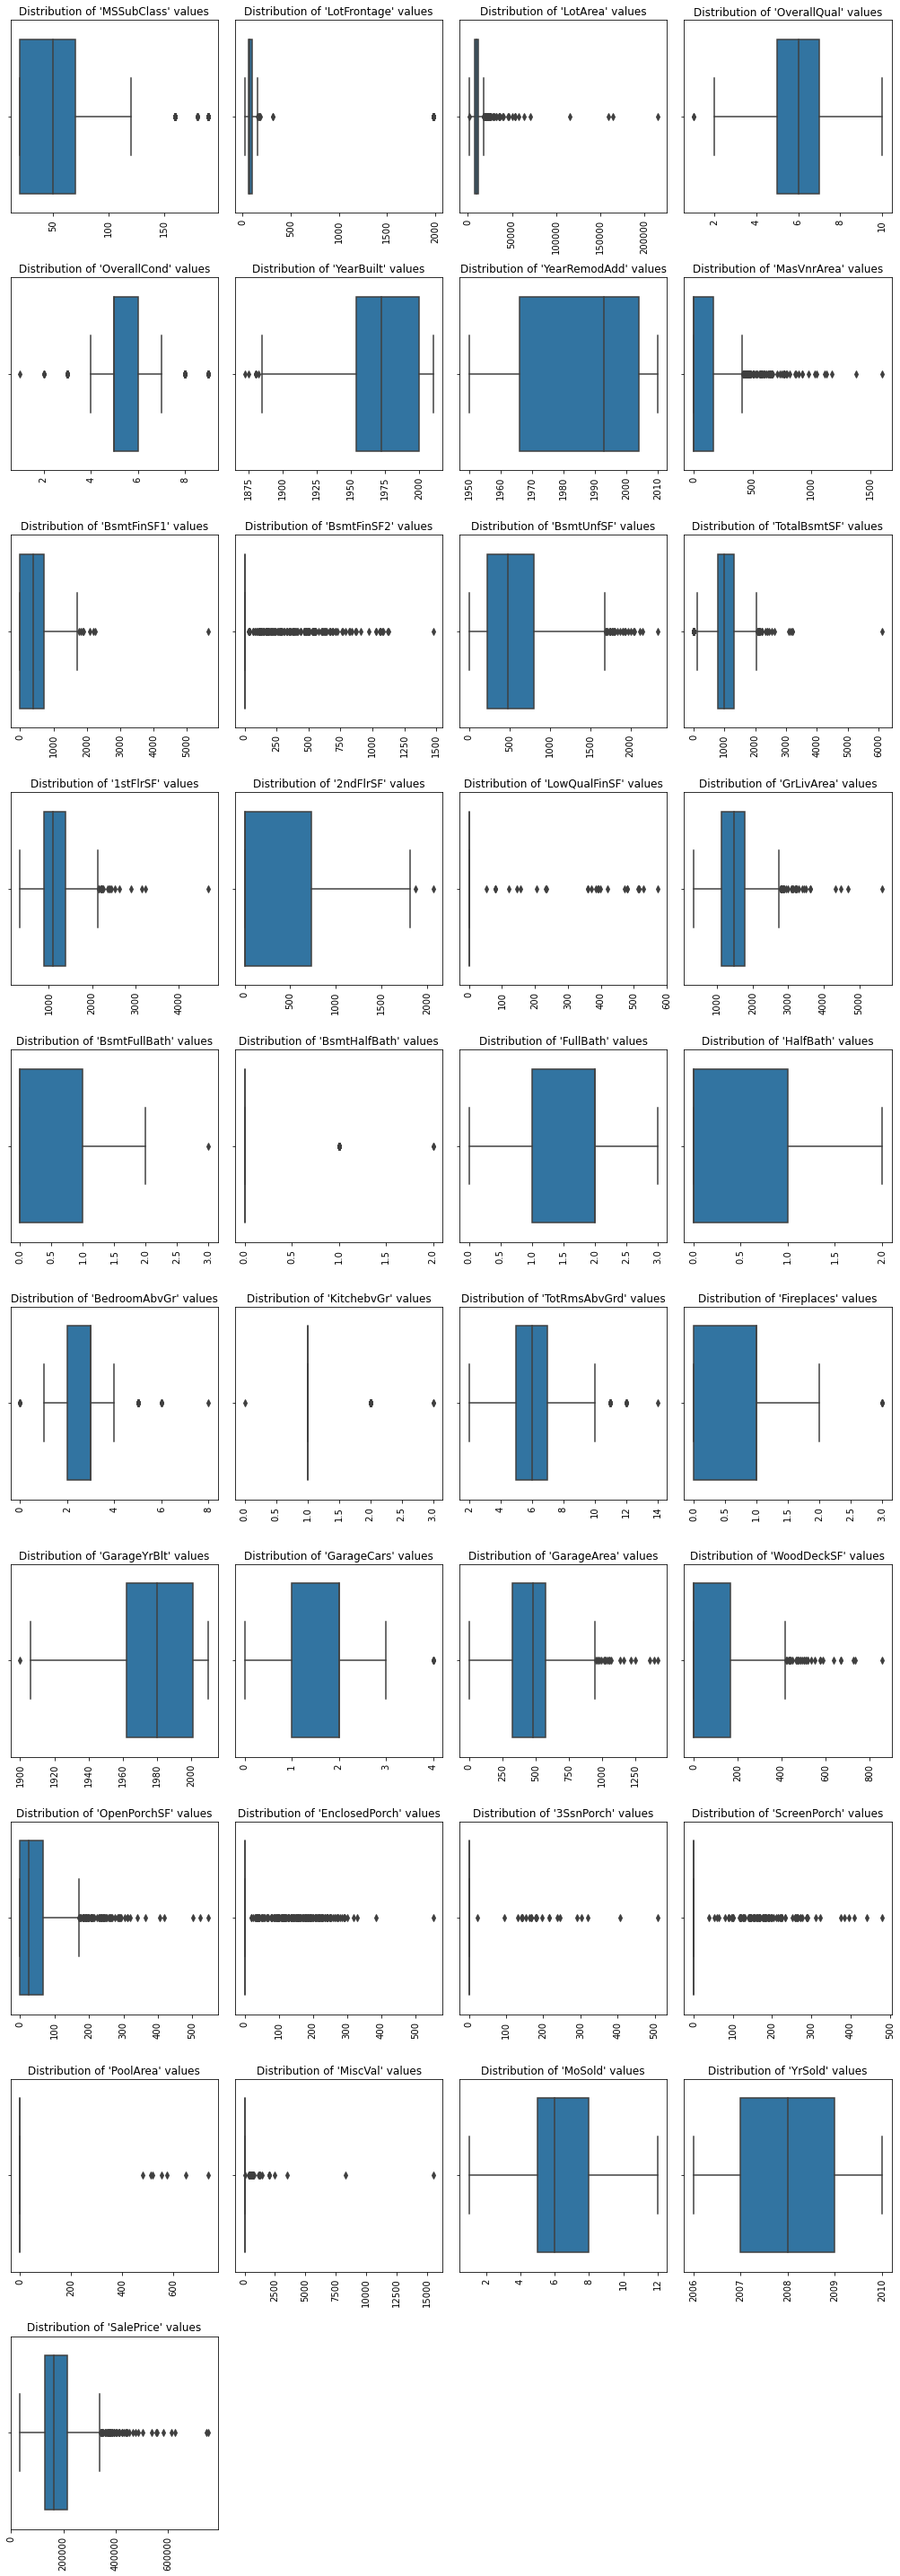

In [42]:
# Run subplot_box function
subplot_box(number_df, varColumns2)

### <u>3c.	Identify significant variables using a correlation matrix</u> 

#### • Heatmap of top correlations between features and SalePrice

In order to analyse the relationships of the property attributes with sale price, we use a heatmap to investigate the top 30 columns (about 13% of the current total number of columns) in terms of correlation to SalePrice:

In [43]:
#Correlation with variable of intrest
nums_cor = number_df.corr()['SalePrice'][:-1].abs().sort_values(ascending=False)

In [44]:
nums_cor

OverallQual      0.789997
GrLivArea        0.710080
GarageCars       0.639686
GarageArea       0.622492
TotalBsmtSF      0.612971
1stFlrSF         0.606849
FullBath         0.562491
TotRmsAbvGrd     0.536311
YearBuilt        0.522896
YearRemodAdd     0.507158
MasVnrArea       0.477493
Fireplaces       0.468930
GarageYrBlt      0.466247
BsmtFinSF1       0.383977
WoodDeckSF       0.324650
2ndFlrSF         0.322710
OpenPorchSF      0.311268
HalfBath         0.282040
LotArea          0.264674
BsmtFullBath     0.225027
BsmtUnfSF        0.215740
BedroomAbvGr     0.171934
KitchebvGr       0.137419
EnclosedPorch    0.128778
ScreenPorch      0.113044
PoolArea         0.093109
MSSubClass       0.082813
OverallCond      0.076294
3SsnPorch        0.045247
MoSold           0.045136
YrSold           0.026180
LowQualFinSF     0.025263
MiscVal          0.020951
BsmtHalfBath     0.015993
LotFrontage      0.014718
BsmtFinSF2       0.010316
Name: SalePrice, dtype: float64

In [45]:
len(number_df.columns)

37

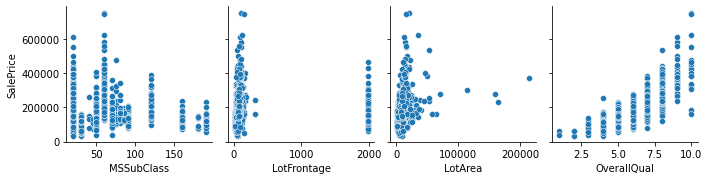

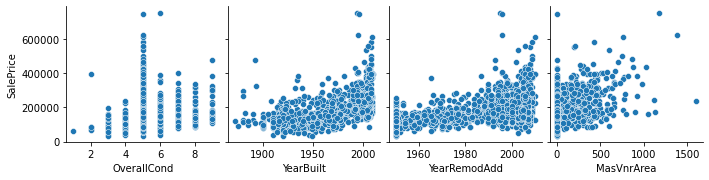

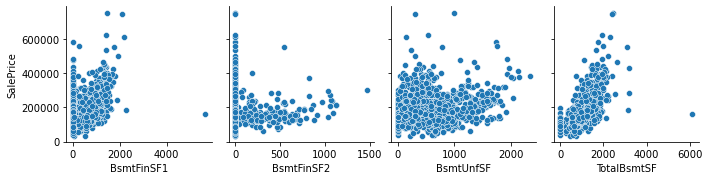

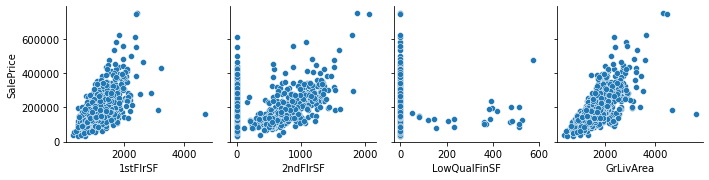

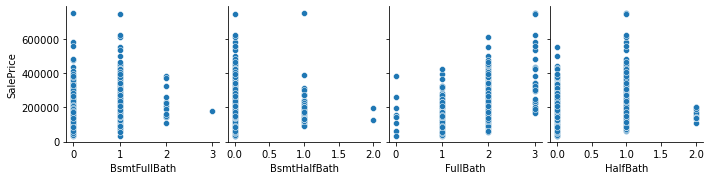

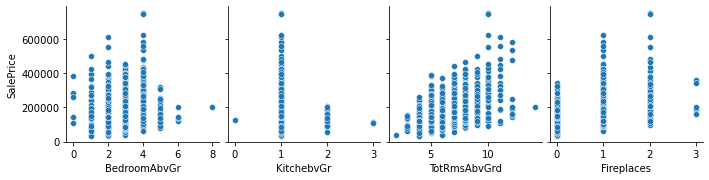

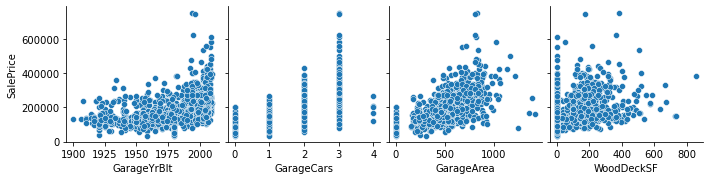

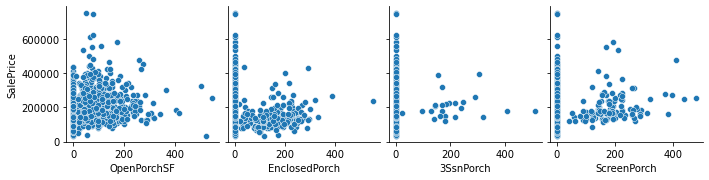

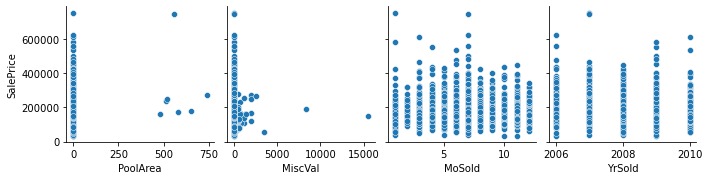

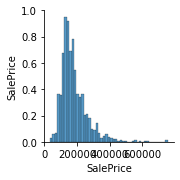

In [46]:
#correlation plot using 'pairplot'
for i in range(0, len(number_df.columns),4):
    sns.pairplot(number_df, y_vars=['SalePrice'], 
                 x_vars=number_df.columns[i:i+4])

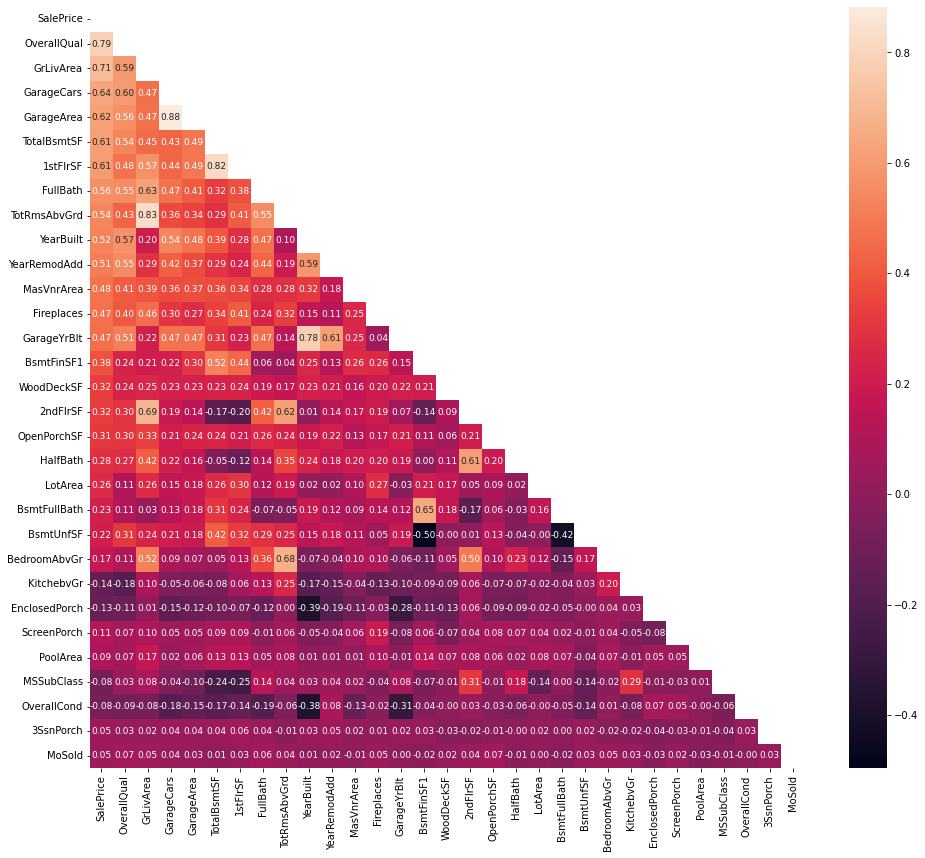

In [47]:
correlations_with_ref_to_saleprice = number_df.corr().loc[:,'SalePrice']
top_correlations = correlations_with_ref_to_saleprice.abs().sort_values(ascending=False).head(31)

top_correlations = number_df.loc[:,list(top_correlations.index)].corr()

mask = np.zeros_like(top_correlations)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16, 14))

g = sns.heatmap(top_correlations, annot=True, annot_kws={"size":9}, fmt='.2f', mask=mask)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

When SalePrice-centric correlations are sorted in descending order, we observe a few familiar variables that exhibit strong relationship with property price. 

- **`Overall Qual`** at 0.79, the property overall construction quality. 
- **`GrLivArea`** at 0.71, which indicates the size of the living space . 
- **`GarageCars`**0.64 in 3rd place 
- **`GarageArea **0.62 in 4th place 
- **`TotalBsmtSF`** 0.61 in 5th place 
- **`1stFlrSF`** 0.61 in 6h. 
- **`YearBuilt`** 0.52 in 10th place do exhibit positive correlation with SalePrice.

In [48]:
top_correlations

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchebvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond,3SsnPorch,MoSold
SalePrice,1.000000,0.789997,0.710080,0.639686,0.622492,0.612971,0.606849,0.562491,0.536311,0.522896,0.507158,0.477493,0.468930,0.466247,0.383977,0.324650,0.322710,0.311268,0.282040,0.264674,0.225027,0.215740,0.171934,-0.137419,-0.128778,0.113044,0.093109,-0.082813,-0.076294,0.045247,0.045136
OverallQual,0.789997,1.000000,0.594417,0.599734,0.560543,0.537122,0.476936,0.552266,0.430549,0.571111,0.549573,0.411876,0.400398,0.512611,0.236823,0.240652,0.298543,0.303482,0.271466,0.106324,0.108505,0.309602,0.105900,-0.184642,-0.112950,0.066403,0.065743,0.034491,-0.090628,0.031029,0.068760
GrLivArea,0.710080,0.594417,1.000000,0.467149,0.469423,0.453840,0.565833,0.628983,0.825476,0.199343,0.288279,0.390857,0.459400,0.219855,0.206027,0.247981,0.690178,0.330795,0.416473,0.261159,0.032281,0.240816,0.521379,0.095550,0.005813,0.102489,0.170808,0.076930,-0.076541,0.021000,0.053792
GarageCars,0.639686,0.599734,0.467149,1.000000,0.882332,0.433601,0.439550,0.470008,0.363174,0.537492,0.419815,0.364204,0.301632,0.473583,0.222241,0.226669,0.185412,0.211257,0.218172,0.154739,0.130329,0.214535,0.087773,-0.051450,-0.151857,0.051277,0.021140,-0.039043,-0.184866,0.036116,0.039393
GarageArea,0.622492,0.560543,0.469423,0.882332,1.000000,0.486242,0.490877,0.406447,0.339296,0.478439,0.370674,0.373066,0.270826,0.468191,0.295493,0.225418,0.139861,0.238895,0.162029,0.180778,0.177942,0.183943,0.067871,-0.064610,-0.121603,0.052130,0.061292,-0.098141,-0.151062,0.035410,0.026719
TotalBsmtSF,0.612971,0.537122,0.453840,0.433601,0.486242,1.000000,0.818246,0.321206,0.285760,0.392562,0.291492,0.363936,0.339471,0.309372,0.520533,0.234182,-0.171603,0.244914,-0.049017,0.258409,0.305902,0.415976,0.051665,-0.075885,-0.099915,0.085831,0.126820,-0.236906,-0.167230,0.037960,0.011558
1stFlrSF,0.606849,0.476936,0.565833,0.439550,0.490877,0.818246,1.000000,0.377828,0.410224,0.284570,0.242488,0.344501,0.410347,0.226089,0.443232,0.238699,-0.199194,0.210625,-0.119564,0.295919,0.242908,0.318214,0.128330,0.058731,-0.072610,0.090338,0.132669,-0.250050,-0.138814,0.056901,0.031148
FullBath,0.562491,0.552266,0.628983,0.470008,0.406447,0.321206,0.377828,1.000000,0.554166,0.469625,0.440329,0.276833,0.240967,0.467604,0.055808,0.189982,0.424294,0.261509,0.137745,0.122457,-0.067707,0.288464,0.362157,0.127256,-0.120246,-0.006959,0.050103,0.136306,-0.190396,0.036004,0.058944
TotRmsAbvGrd,0.536311,0.430549,0.825476,0.363174,0.339296,0.285760,0.410224,0.554166,1.000000,0.097440,0.193988,0.280682,0.322899,0.141300,0.044074,0.165236,0.617677,0.237234,0.345247,0.187990,-0.053993,0.250682,0.675596,0.253619,0.000861,0.059632,0.083979,0.042406,-0.055964,-0.006657,0.041611
YearBuilt,0.522896,0.571111,0.199343,0.537492,0.478439,0.392562,0.284570,0.469625,0.097440,1.000000,0.590674,0.315707,0.150148,0.775884,0.249239,0.226891,0.009566,0.185081,0.240417,0.015639,0.186305,0.149810,-0.068619,-0.173951,-0.386839,-0.049169,0.005310,0.028397,-0.376763,0.032037,0.009362


#### Columns I decided to drop from number_df DataFrame are those below the threshold of 0.1, namely:

- PoolArea	0.093109
- MSSubClass	-0.082813	
- OverallCond	-0.076294
- 3SsnPorch	0.045247	
- MoSold	0.045136	



In [49]:
number_df.drop(columns=['PoolArea','MSSubClass', 
                        'OverallCond', '3SsnPorch', 
                        'MoSold'], inplace=True)

In [50]:
number_df.shape

(1452, 32)

### <u>3d.	Pair plot for distribution and density</u>

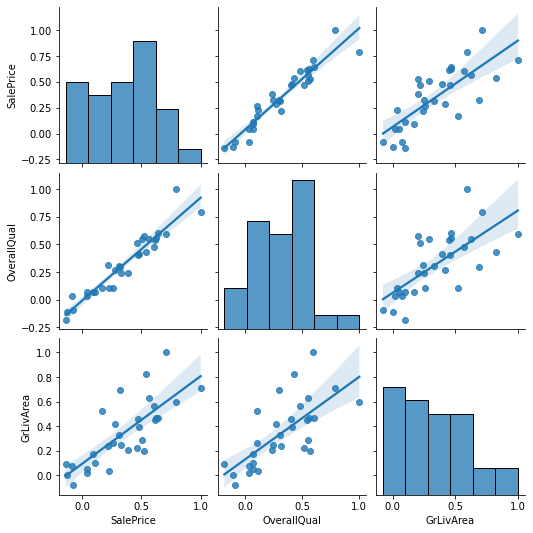

In [51]:
#plot correlation using pairplot
#sns.pairplot(top_correlations, hue='OverallQual')
sns.pairplot(top_correlations, 
             vars=['SalePrice', 'OverallQual', 'GrLivArea'],
            kind='reg'
            );

### <u>*3d1. Analysis of continuous variables and SalePrice*</u>

One of the major factors that affect the price of property would be the size of it. This dataset provides many size metrics on the various segments of a property such as porch, 1st floor, basement, etc. One of the metric we can directly rely on is the Gr Liv Area, which would give us the general size of the living space on the property. We proceed to build a scatter plot of this column against price:

#### • Scatter plot of Gr Liv Area vs SalePrice

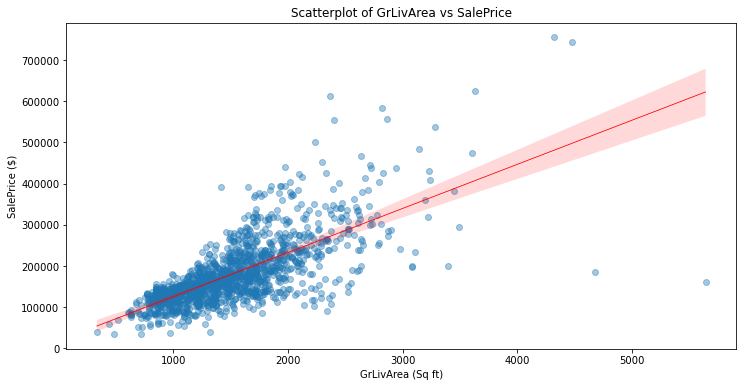

In [52]:
plt.figure(figsize=(12,6))
g = sns.regplot(data=number_df, x='GrLivArea', y='SalePrice', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.xlabel(xlabel='GrLivArea (Sq ft)')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Scatterplot of GrLivArea vs SalePrice')
plt.show()

- We observe a general upward trend between the 2 columns, SalePrice and GrLivArea or living space. to increase alongside the size of . 
- We also notice that majority of GrLivArea sizes are clustered between 750 to 2,000 square feet, 
- Then the bulk for SalesPrices seem to range between 90,000 to 200,000 dollars

#### • Scatter plots of other continuous variables vs SalePrice

We analyse a few more continuous variables against SalePrice:

In [53]:
def subplot_scatterplots_against_saleprice(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3))
    ncols = 3
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3*nrows))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.regplot(x=dataframe.loc[:,column], y=dataframe.loc[:,'SalePrice'], 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8}, ax=ax[i])
        ax[i].set_xlabel(xlabel=column)
        ax[i].set_ylabel(ylabel='SalePrice ($)')
        ax[i].set_title(label='Scatterplot of {} vs SalePrice'.format(column), size=8)
    if len(list_of_columns) < nrows*ncols:
        for i in range(nrows*ncols - len(list_of_columns)):
            ax[nrows*ncols - 1 - i].set_axis_off()
    fig.tight_layout()

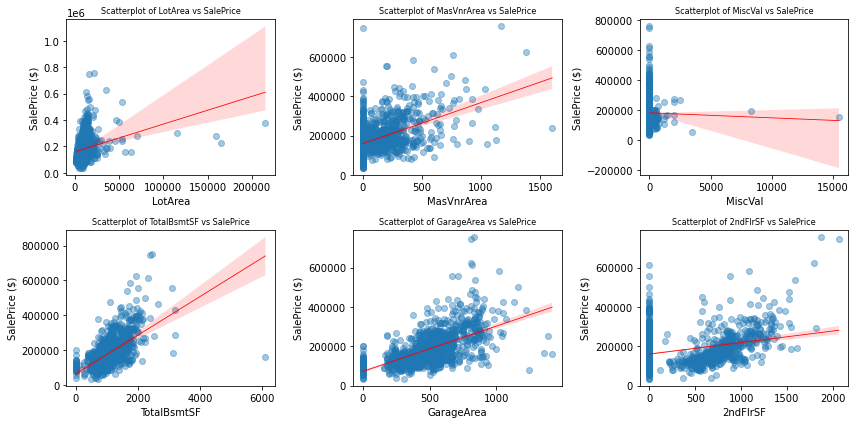

In [54]:
subplot_scatterplots_against_saleprice(
    number_df, 
    ['LotArea','MasVnrArea','MiscVal','TotalBsmtSF','GarageArea','2ndFlrSF'])

- Except for Misc Val (value heavily skewed towards 0, thus affecting trend line), most other continuous variables exhibit a general positive relationship with SalePrice. 

- This is due to most of the continuous variables being area-centric, and they would typically follow the trend of Gr Liv Area, where sale price would increase alongside area size.

#### • More Scatter plots of top 7 numerical variables vs SalePrice

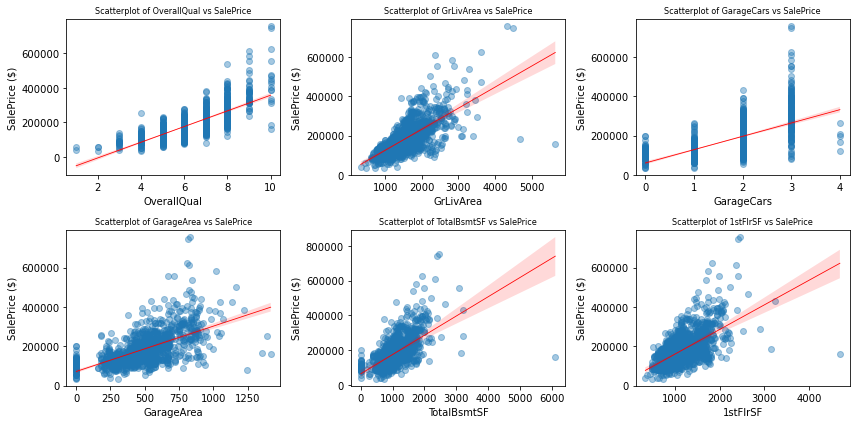

In [55]:
subplot_scatterplots_against_saleprice(
    number_df, 
    ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF'])

- These values as expected exhibit a general positive relationship with SalePrice. 

### <u>3d2.	Histogram & Boxplot Analysis of GrLivArea vs SalePrice</u>
Distributions can be better observed through histogram and boxplot. Again, we examine the relationship between GrLivArea and SalePrice :

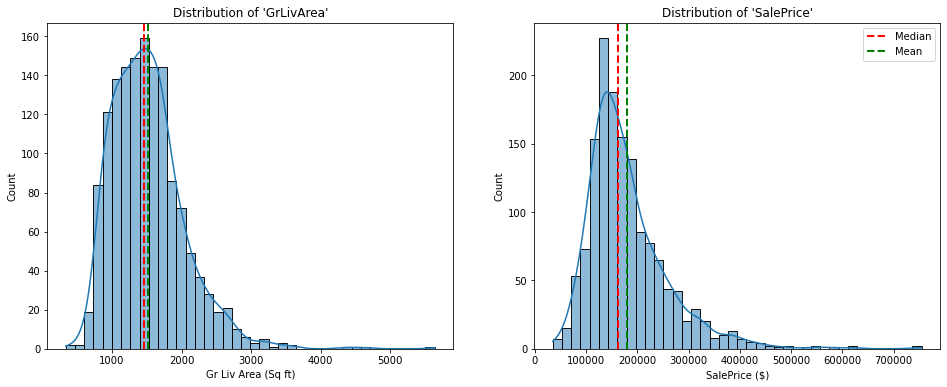

In [56]:
fig, ax = plt.subplots(figsize=(16,6), ncols=2)
sns.histplot(data=number_df, x='GrLivArea',bins=40, kde=True, ax=ax[0])
ax[0].axvline(number_df.loc[:,'GrLivArea'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
ax[0].axvline(number_df.loc[:,'GrLivArea'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
ax[0].set_title('Distribution of \'GrLivArea\'', fontsize=12)
ax[0].set_xlabel('Gr Liv Area (Sq ft)')

sns.histplot(data=number_df, x='SalePrice',bins=40, kde=True, ax=ax[1])
ax[1].axvline(number_df.loc[:,'SalePrice'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
ax[1].axvline(number_df.loc[:,'SalePrice'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
ax[1].set_title('Distribution of \'SalePrice\'', fontsize=12)
ax[1].set_xlabel('SalePrice ($)')
plt.legend()
plt.show()

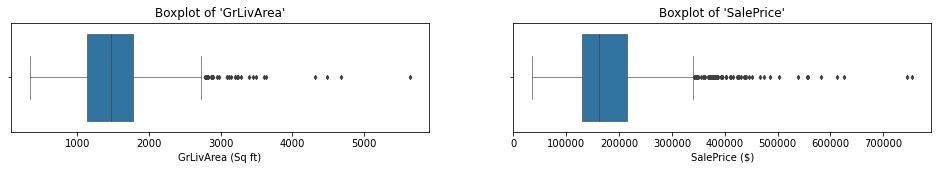

In [57]:
fig, ax = plt.subplots(figsize=(16.5,2), ncols=2)

sns.boxplot(data=number_df, x='GrLivArea', linewidth=0.6, fliersize=3, ax=ax[0])
ax[0].set_title('Boxplot of \'GrLivArea\'', fontsize=12)
ax[0].set_xlabel('GrLivArea (Sq ft)')

sns.boxplot(data=number_df, x='SalePrice', linewidth=0.6, fliersize=3, ax=ax[1])
ax[1].set_title('Boxplot of \'SalePrice\'', fontsize=12)
ax[1].set_xlabel('SalePrice ($)')

plt.show()

**`Histogram`** shows a non-normal distribution that is right skewed, with mean being on the right side of median too. The **`boxplot`** shows outliers residing only on the higher end of the scale, meaning there is a small number of property that in the dataset that has very huge living space.

The same characteristics can be observed for sale price too, in that the distribution is right-skewed, with all outliers on the higher end of the scale, due to a small number of property having really high prices.

**=====================================================================**

## 4.	EDA of categorical variables:

**=====================================================================**


### <u>4a1. Missing value treatment<u>

#### Here we will replace missing values. This will be done in these steps.
- Finding the missing values columns having na values
- Replacing or Drop missing values.

#### •	Finding columns with missing or na values

In [58]:
null_stats = pd.DataFrame(category_df.isnull().sum(), columns=['missing_value_count'])
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / category_df.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)

,missing_value_count,% of dataset
FireplaceQu,690,47.26
GarageType,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtExposure,38,2.60
BsmtFinType2,38,2.60
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtFinType1,37,2.53


#### • Replacing or Drop missing values
1. If the number of missing values is very large then it can be <u>replaced with a new category</u> 'Unknown'.
2. If the number of missing values is small then <u>rows can be droped</u>.
3. Missing values can be <u>replaced with the most frequent</u> category or mode. 

##### 1. Replace categorical missing value with new category

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

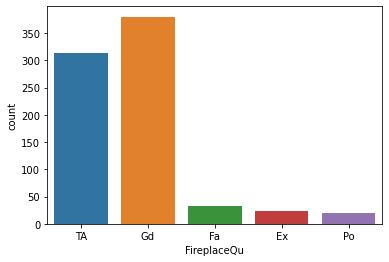

In [59]:
#Countplot of FireplaceQu BEFORE replacing with new category 'Unknown'
sns.countplot(x='FireplaceQu', data= category_df)

In [60]:
#replacing with new category 'Unknown'
category_df['FireplaceQu'].fillna('Unknown', inplace=True)

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

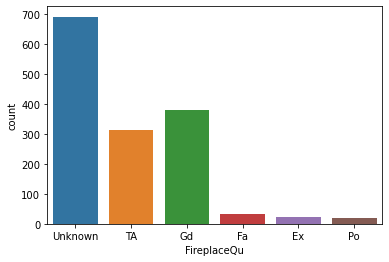

In [61]:
#Countplot of FireplaceQu AFTER replacing with new category 'Unknown'
sns.countplot(x='FireplaceQu', data= category_df)

##### 2. Drop categorical missing values Rows

In [62]:
category_df.dropna(subset=['MasVnrType', 'Electrical'], inplace=True)

##### 3. Repleace categorical missing value with mode

- Identifing <u>remaining columns</u> with missing or na values
- Setting up columns list to loop through to replace missing values
- Replacing these missing values with 'mode' values using a for loop
- Re-check missing value count for categorigal columns

##### •	Identifing remaining columns with missing or na values

In [63]:
null_stats = pd.DataFrame(category_df.isnull().sum(), columns=['missing_value_count'])
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / category_df.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)

,missing_value_count,% of dataset
GarageType,81,5.58
GarageFinish,81,5.58
GarageQual,81,5.58
GarageCond,81,5.58
BsmtExposure,38,2.62
BsmtFinType2,38,2.62
BsmtQual,37,2.55
BsmtCond,37,2.55
BsmtFinType1,37,2.55


##### •	Setting up columns list to loop through to replace missing values

In [64]:
# Getting missing value columns having greater than 0
greaterColumns = category_df.isnull().sum() > 0

In [65]:
# Set a new column called cols in category_df; they will be true
cols = category_df.columns[greaterColumns]

In [66]:
# Storing category_df[cols in variable as mySubCols list
mySubCols = category_df[cols].columns

In [67]:
# Displaying the mySubCols list
mySubCols

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

**<span style="color:magenta">The above mySubCols list is ready to loop through</span>**

##### •	 Replacing these missing values with 'mode' values using a for loop.

In [68]:
# var
for col in mySubCols:
    var = category_df[col].mode().to_string()
    category_df[col].fillna(var, inplace=True)

#####  •  Re-check missing value count for categorigal columns

In [69]:
null_stats = pd.DataFrame(category_df.isnull().sum(), columns=['missing_value_count'])
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / category_df.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)

,missing_value_count,% of dataset


**<span style="color:magenta">SUMMARY: Missing or null valuse have been treated Using the above processes</span>**

In [70]:
category_df.shape

(1451, 40)

### <u>4b.	Count plot and box plot for bivariate analysis</u>

- Bivariate Analysis is one of the statistical analysis where two variables are observed.
- One variable is dependent while the other is independent. These variables are usually denoted by X and Y.
- Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.
- Below the focus is on categrotical/numeric Bivariate Analysis.
- **We begin with an Univariate Analysis of a countplot**

#### •	 Count Plot for one categorigal column

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

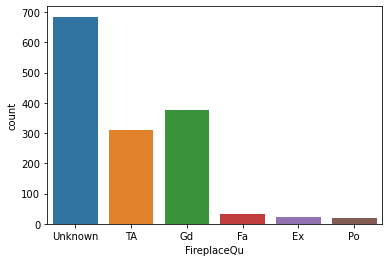

In [71]:
#Countplot of FireplaceQu AFTER replacing with new category 'Unknown'
sns.countplot(x='FireplaceQu', data= category_df)

In [72]:
category_df['FireplaceQu'].value_counts()

Unknown    685
Gd         378
TA         311
Fa          33
Ex          24
Po          20
Name: FireplaceQu, dtype: int64

#### •	 Bar Plot and Bivariate Analysis

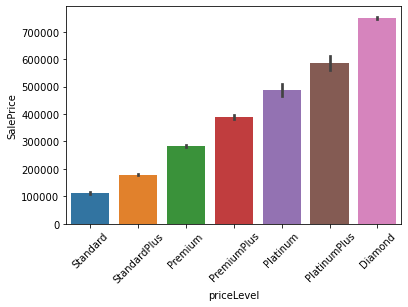

In [73]:
# Bivariate barplot category_df['priceLevel'] & number_df['SalePrice']
ax = sns.barplot(x=category_df['priceLevel'], y=number_df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

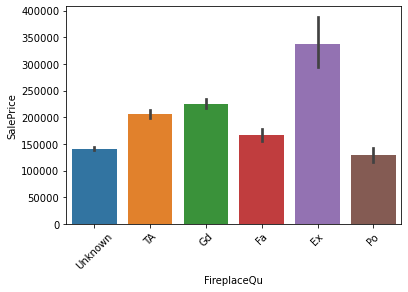

In [74]:
# Bivariate barplot category_df['FireplaceQu'] & number_df['SalePrice']
ax = sns.barplot(x=category_df['FireplaceQu'], y=number_df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

#### •	Box plot and Bivariate Analysis

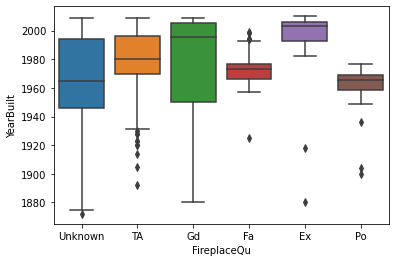

In [75]:
# Bivariate boxplot category_df['FireplaceQu'] & number_df['YearBuilt']
sns.boxplot(x=category_df['FireplaceQu'], y=number_df['YearBuilt'])
plt.show()

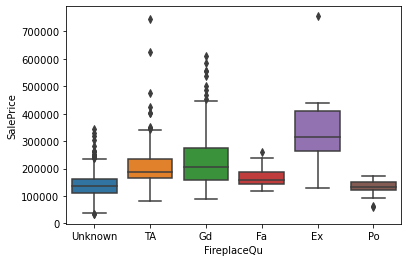

In [76]:
# Bivariate boxplot category_df['FireplaceQu'] & number_df['SalePrice']
sns.boxplot(x=category_df['FireplaceQu'], y=number_df['SalePrice'])
plt.show()

#### • Box plot 2 and Bivariate Analysis

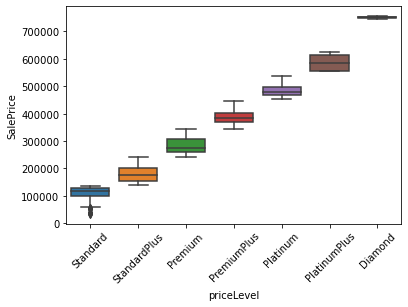

In [77]:
# Bivariate boxplot category_df['priceLevel'] & number_df['SalePrice']
ax = sns.boxplot(x=category_df['priceLevel'], y=number_df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

#### • Stripe plot and Bivariate Analysis

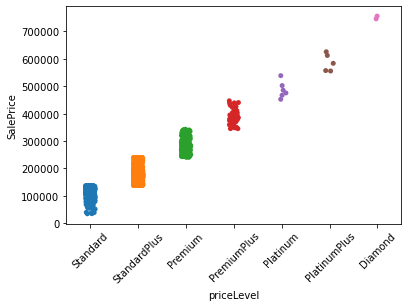

In [78]:
# Bivariate boxplot category_df['priceLevel'] & number_df['SalePrice']
ax = sns.stripplot(x=category_df['priceLevel'], y=number_df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

### 4b. Count plot and box plot for bivariate analysis

### 4b1. Count plots - Investigate distributions in norminal columns
We now proceed to inspect and process the norminal columns. First we capture them using dtypes filtering:

#### • Capture Norminal Columns

In [79]:
nominal_columns = list(col for col in category_df.select_dtypes([object]).columns)

In [80]:
nominal_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functiol',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

#### • Function to CountPlot Norminal Columns

In [81]:
## Next we define a helper function to plot the distribution of values within a given nominal column:
def subplot_distributions(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.countplot(data=dataframe, x=column, ax=ax[i])
        ax[i].set_title('Distribution of \'' + column + '\' values', fontsize=12)
        plt.setp(ax[i].get_xticklabels(), rotation=90, fontsize=10) # smaller font for x-tick
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
    if len(list_of_columns) < nrows*ncols:
        for i in range(nrows*ncols - len(list_of_columns)):
            ax[nrows*ncols - 1 - i].set_axis_off() # get rid of empty subplots if they are present
    fig.tight_layout()

#### • Executing Function to CountPlot Norminal Columns

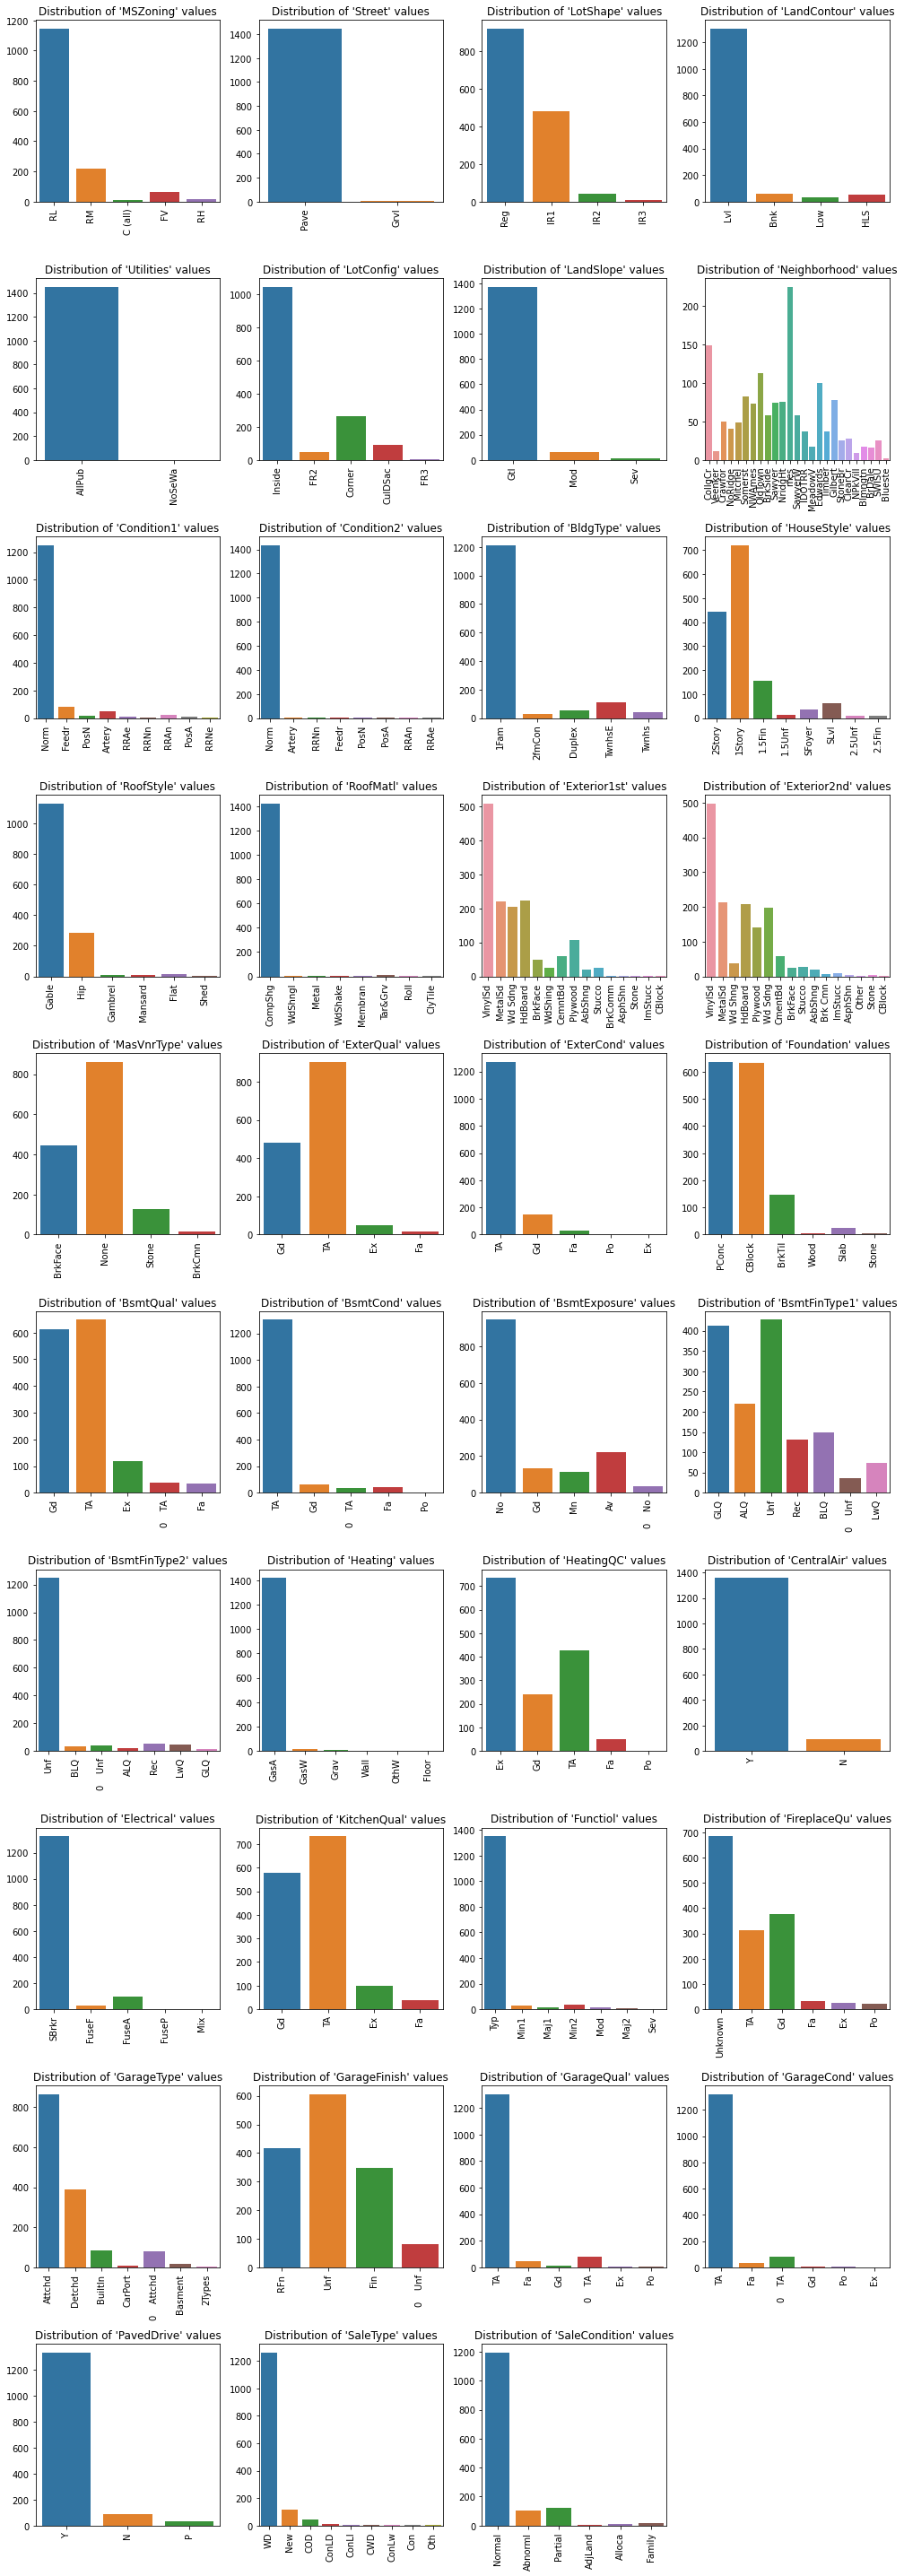

In [82]:
## Then we proceed to plot the nominal columns in order 
# to take a closer look at their distributions:

subplot_distributions(category_df, nominal_columns)

#### Above, we observe different nominal columns having vary degrees of values, 

- From 2 values columns like Street and Central Air, to columns like Neighborhood with 28 possible values. 
- All of them display a skew to at least 1 nominal value, some to the extend whereby all other nominal values are close to neglible. 

We proceed to inspect the proportion of which the mode value occupies these columns:

#### • Threshold Proportion of 90.0

In [83]:
nominal_stats = {'column': [], 'most_frequent_value': [], 'percentage_occurrence':[], 'column_status': []}

threshold = 90.0 # threshold value for considering the column to be severely skewed towards the mode value

for col in nominal_columns:
    nominal_stats['column'].append(col)
    
    mode = category_df.loc[:,col].mode()[0]
    nominal_stats['most_frequent_value'].append(mode)
    
    proportion = np.round(category_df.loc[category_df.loc[:,col]==category_df.loc[:,col].mode()[0],:].shape[0] / category_df.shape[0] * 100, 1)
    nominal_stats['percentage_occurrence'].append(proportion)
    
    nominal_stats['column_status'].append('' if proportion < threshold else 'Severely skewed')

nominal_stats_df = pd.DataFrame(nominal_stats)
nominal_stats_df

,column,most_frequent_value,percentage_occurrence,column_status
0,MSZoning,RL,78.9,
1,Street,Pave,99.6,Severely skewed
2,LotShape,Reg,63.3,
3,LandContour,Lvl,89.7,
4,Utilities,AllPub,99.9,Severely skewed
5,LotConfig,Inside,72.0,
6,LandSlope,Gtl,94.6,Severely skewed
7,Neighborhood,mes,15.5,
8,Condition1,Norm,86.2,
9,Condition2,Norm,99.0,Severely skewed


#### • Remove nominal columns with severely skewed distributions of values
Using a threshold of 90% occurrence of a nominal value in a column to consider it as severely skewed, we isolated as columns for dropping

- Street
- Utilities
- LandSlope
- Condition2
- RoofMatl
- Heating
- Central Air
- Electrical
- Functiol
- GarageCond	
- PavedDrive	

These columns would have 10% or lesser influence on the price due to their scarcity.

In [84]:
category_df.shape

(1451, 40)

In [85]:
category_df.drop(columns=list(nominal_stats_df.loc[nominal_stats_df.loc[:,'percentage_occurrence']>threshold,'column']), errors='ignore', inplace=True)
nominal_columns = list(category_df.select_dtypes([object]).columns)
category_df.shape

(1451, 29)

### <u>4c.	Identify significant variables using p-values & Chi-2 values</u>

**NOTE: Preforming chi-square p-value selection involves several steps.**

Categorical independent & dependent values are necessary to perform a Chi-Square test and get resulting p-values.  The Categorical independent values we have.  The Categorical dependent we created earlier in step 2c which we added,

My approach here is to bin new categories from the already existing numerical dependent column.  The binning of this column will be used as a dependent column, that is categorical.

The following are some of the steps to bin and preforming Chi-Square test:

##### 1) Prepare new_category DataFrame for Chi-Square Test
- Drop certain columns from new_category if necessary, because of large number of unique values.

##### 2) Perform Chi-Square Test & Get P-Valuet
- Import chi2 - from sklearn.feature_selection import chi2
- (Ensure there are no missing values. This was already done earlier)
- Perfom label encoding on new_category Dataset
- Create y dependent variables(with 'priceLevel') & X independent)
- Split data into train/test. Perform on trainng; avoid overfittimg
- Get chi2 scores used with categorical columns, categorical independent and categorical dependent

##### 3) Display Scores in Graph
- Display chi_values
- Display p values
- Significant variables using Chi-Square

### *4c.1 Prepare new_category DataFrame for Chi-Square Test*

#### • Create a new_category DataFrame form category_df¶

In [86]:
category_df.head(1)

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition,priceLevel
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Gd,Unknown,Attchd,RFn,TA,WD,Normal,StandardPlus


In [87]:
new_category = category_df

In [88]:
new_category.head(1)

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition,priceLevel
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Gd,Unknown,Attchd,RFn,TA,WD,Normal,StandardPlus


### *4c.2 Perform Chi-Square Test & Get P-Values*

#### • Perfom label encoding on new_category Dataset

In [89]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

In [90]:
# Loop through x1 to decode
for col in new_category.columns:
    le = LabelEncoder()
    new_category[col] = le.fit_transform(new_category[col])
new_category.head(3)

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition,priceLevel
0,3,3,3,4,5,2,0,5,1,12,13,1,2,4,2,3,4,4,3,6,0,2,5,2,2,5,8,4,6
1,3,3,3,2,23,1,0,2,1,8,8,2,3,4,1,3,4,2,1,6,0,3,4,2,2,5,8,4,6
2,3,0,3,4,5,2,0,5,1,12,13,1,2,4,2,3,4,3,3,6,0,2,4,2,2,5,8,4,6


#### • Create y dependent variables(with 'priceLevel') & X independent)

In [91]:
#y dependent 
y = new_category['priceLevel']

In [92]:
# new_category.drop("priceLevel")
X = new_category.drop("priceLevel", axis=1)

#### • Split data into train/test

In [93]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [94]:
# Create train_test_split variables
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.3, 
                                            random_state=12)

#### • Get chi2 scores

In [95]:
# Import chi2 Moduel
from sklearn.feature_selection import chi2

In [96]:
# chi2 scores for x
# chi_scor = chi2(X, y)
chi_scor = chi2(X_train, y_train)

In [97]:
chi_scor

(array([  9.8743436 ,  80.89539268,   1.33505003,  12.35447588,
         39.23367661,   8.95797708,  19.09631265,  67.18238857,
         37.64680225,   8.51110674,  13.68767314,   4.07201059,
         64.74244281,   3.54178563,  67.88561374,  64.95178932,
          6.08897113,  19.08440836,   2.95769347,   4.78970363,
        327.67968399,  90.48774335, 116.72070696,  90.38020566,
         38.36135233,  47.11102467,   2.97101371,  18.88593287]),
 array([1.30044400e-01, 2.33352363e-15, 9.69689876e-01, 5.45122829e-02,
        6.44095175e-07, 1.75955241e-01, 4.00403045e-03, 1.54452024e-12,
        1.31683350e-06, 2.02996735e-01, 3.33264159e-02, 6.66931886e-01,
        4.86924003e-12, 7.38402257e-01, 1.10883621e-12, 4.41285761e-12,
        4.13297703e-01, 4.02343006e-03, 8.14137724e-01, 5.71054376e-01,
        9.51417361e-68, 2.39948261e-17, 7.95255563e-23, 2.52614966e-17,
        9.54651126e-07, 1.77811005e-08, 8.12476033e-01, 4.36067510e-03]))

In [98]:
pvalues = pd.Series(chi_scor[1])
pvalues.index = X_train.columns

In [99]:
pvalues.sort_values(ascending=False) < 0.05

LandContour      False
BsmtFinType1     False
SaleType         False
ExterCond        False
MasVnrType       False
BsmtFinType2     False
BsmtCond         False
Exterior1st      False
Condition1       False
MSZoning         False
LotConfig        False
Exterior2nd       True
SaleCondition     True
BsmtExposure      True
BldgType          True
RoofStyle         True
GarageFinish      True
Neighborhood      True
GarageQual        True
ExterQual         True
BsmtQual          True
HouseStyle        True
Foundation        True
LotShape          True
GarageType        True
KitchenQual       True
FireplaceQu       True
HeatingQC         True
dtype: bool

In [100]:
pvalues.sort_values(ascending=False)

LandContour      9.696899e-01
BsmtFinType1     8.141377e-01
SaleType         8.124760e-01
ExterCond        7.384023e-01
MasVnrType       6.669319e-01
BsmtFinType2     5.710544e-01
BsmtCond         4.132977e-01
Exterior1st      2.029967e-01
Condition1       1.759552e-01
MSZoning         1.300444e-01
LotConfig        5.451228e-02
Exterior2nd      3.332642e-02
SaleCondition    4.360675e-03
BsmtExposure     4.023430e-03
BldgType         4.004030e-03
RoofStyle        1.316834e-06
GarageFinish     9.546511e-07
Neighborhood     6.440952e-07
GarageQual       1.778110e-08
ExterQual        4.869240e-12
BsmtQual         4.412858e-12
HouseStyle       1.544520e-12
Foundation       1.108836e-12
LotShape         2.333524e-15
GarageType       2.526150e-17
KitchenQual      2.399483e-17
FireplaceQu      7.952556e-23
HeatingQC        9.514174e-68
dtype: float64

### *4c.3 Display Scores in Graph*

#### • Display chi_values

<AxesSubplot:>

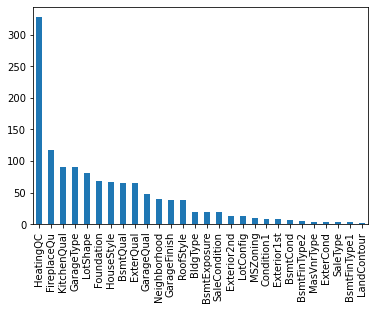

In [101]:
#Higher the chi value the higher the importance
chi_values = pd.Series(chi_scor[0], index=X_train.columns)
chi_values.sort_values(ascending=False, inplace=True)

#Plot to see how high the chi value
chi_values.plot.bar()


#### • Display p values

<AxesSubplot:>

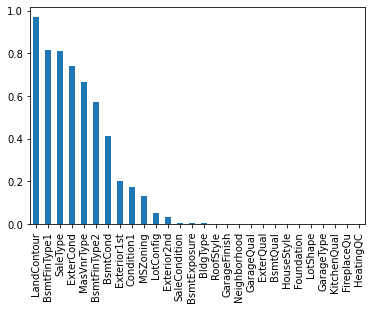

In [102]:
# Lower the p value < 0.05 the higher the importance
p_values = pd.Series(chi_scor[1], index=X_train.columns)
p_values.sort_values(ascending=False, inplace=True)

#Plot to see how high the chi value
p_values.plot.bar()


In [103]:
p_values

LandContour      9.696899e-01
BsmtFinType1     8.141377e-01
SaleType         8.124760e-01
ExterCond        7.384023e-01
MasVnrType       6.669319e-01
BsmtFinType2     5.710544e-01
BsmtCond         4.132977e-01
Exterior1st      2.029967e-01
Condition1       1.759552e-01
MSZoning         1.300444e-01
LotConfig        5.451228e-02
Exterior2nd      3.332642e-02
SaleCondition    4.360675e-03
BsmtExposure     4.023430e-03
BldgType         4.004030e-03
RoofStyle        1.316834e-06
GarageFinish     9.546511e-07
Neighborhood     6.440952e-07
GarageQual       1.778110e-08
ExterQual        4.869240e-12
BsmtQual         4.412858e-12
HouseStyle       1.544520e-12
Foundation       1.108836e-12
LotShape         2.333524e-15
GarageType       2.526150e-17
KitchenQual      2.399483e-17
FireplaceQu      7.952556e-23
HeatingQC        9.514174e-68
dtype: float64

#### •	Significant variables using Chi-Square

**<span style="color:magenta">SUMMARY: From the above list, all the columns below LotConfig can be kept. These values show a significance less than 0.05</span>**

### <u>4d. ANOVA Test Categorigal to Numeric</u>

##### <span style="color:red">NOTE: ANOVA Test are other processess to identify significant features</span>

Here we will perform SelectKBest with f_classif, then with chi2.

#### • Import SelectKBest, chi2, f_classif

In [104]:
#Import SelectKBest, chi2, f_classif
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#### • f_classif Features

In [105]:
select_featuresC = SelectKBest(f_classif, k=19).fit(X,y)

In [106]:
sel_BoolC = select_featuresC.get_support()

In [107]:
X_selC = X[X.columns[sel_BoolC]]
X_selC.head()

,MSZoning,LotShape,Condition1,HouseStyle,RoofStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,SaleCondition
0,3,3,2,5,1,1,2,2,3,4,4,6,0,2,5,2,2,5,4
1,3,3,1,2,1,2,3,1,3,4,2,6,0,3,4,2,2,5,4
2,3,0,2,5,1,1,2,2,3,4,3,6,0,2,4,2,2,5,4
3,3,0,2,5,1,2,3,0,4,2,4,6,2,2,2,6,3,5,0
4,3,0,2,5,1,1,2,2,3,4,1,6,0,2,4,2,2,5,4


In [108]:
X_selC.columns

Index(['MSZoning', 'LotShape', 'Condition1', 'HouseStyle', 'RoofStyle',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'SaleCondition'],
      dtype='object')

#### • Chi-2 Features

In [109]:
select_features = SelectKBest(chi2, k=19).fit(X,y)

In [110]:
sel_Bool = select_features.get_support()

In [111]:
X_sel = X[X.columns[sel_Bool]]
X_sel.head()

,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,SaleCondition
0,3,4,5,0,5,1,12,13,2,2,3,4,0,2,5,2,2,5,4
1,3,2,23,0,2,1,8,8,3,1,3,2,0,3,4,2,2,5,4
2,0,4,5,0,5,1,12,13,2,2,3,3,0,2,4,2,2,5,4
3,0,0,6,0,5,1,13,15,3,0,4,4,2,2,2,6,3,5,0
4,0,2,14,0,5,1,12,13,2,2,3,1,0,2,4,2,2,5,4


In [112]:
X_sel.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'SaleCondition'],
      dtype='object')

#### • Transformed Chi-2 Features

In [113]:
select_featuresT = SelectKBest(chi2, k=19).fit_transform(X,y)

In [114]:
pvaluesT = pd.Series(select_featuresT[1])
pvaluesT.index = X_sel.columns

In [115]:
pvaluesT.sort_values(ascending=False)

Neighborhood     23
Exterior1st       8
Exterior2nd       8
GarageQual        5
SaleCondition     4
FireplaceQu       4
BsmtQual          3
KitchenQual       3
LotShape          3
ExterQual         3
LotConfig         2
BsmtExposure      2
HouseStyle        2
GarageType        2
GarageFinish      2
RoofStyle         1
Foundation        1
HeatingQC         0
BldgType          0
dtype: int32

In [116]:
select_featuresT

array([[ 3,  4,  5, ...,  2,  5,  4],
       [ 3,  2, 23, ...,  2,  5,  4],
       [ 0,  4,  5, ...,  2,  5,  4],
       ...,
       [ 3,  4,  6, ...,  2,  5,  4],
       [ 3,  4, 24, ...,  3,  5,  4],
       [ 3,  4,  7, ...,  1,  5,  4]])

**=====================================================================**

## 5. Combine significant categorical & numerical var

**=====================================================================**

### <u>5a. Numerical features I kept</u>

In this notebook I have used A Correlation Matrix to determine which columns to keep and or drop in the number_df

##### Features I have kept using correlation matrix are these 32: 
- 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
- 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
- '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
- 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr',
- 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
- WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
- 'YrSold', 'SalePrice'


In [117]:
number_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [118]:
number_df.shape

(1452, 32)

### <u>5b. Categorical features to keep</u>

I have used a threshold Proportion of 90.0 amd also I have used chi2 and the SelectKBest method to select the k highest. The k choosen for chi2 is 19. Which will reduce the top number of category_df features from 29 to 19.

##### Features to kept using threshold Proportion of 90.0 are 29
- 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
- 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
- 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
- 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
- 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
- 'GarageQual', 'SaleType', 'SaleCondition', 'priceLevel'

##### Features to keep using chi2 getting these as the top 19
- 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
- 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation',
- 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
- 'GarageType', 'GarageFinish', 'GarageQual', 'SaleCondition'

#### From these various feature selection models I will:
- Use category_df without considering reduction to 19 with chi2
- Drop the 'priceLevel' before Combining 
- Combine the significant categorical and numerical variables

#### • Use category_df

In [119]:
category_df.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'SaleType', 'SaleCondition', 'priceLevel'],
      dtype='object')

In [120]:
category_df.shape

(1451, 29)

#### • Drop the 'priceLevel' before Combining

In [121]:
category_df.drop(columns=['priceLevel'], inplace=True)

In [122]:
category_df.shape

(1451, 28)

**<span style="color:magenta">SUMMARY: There are 32 numeric features and 28 categorical features to combined into a new_data DataFrame.</span>**

### <u>5c. Combine new_numbers & new_category2 to form new_data<u>

In [123]:
# Merge Dataframes on index
new_data = pd.merge(category_df, number_df, left_index=True, right_index=True)

In [124]:
new_data.head(3)

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,SalePrice
0,3,3,3,4,5,2,0,5,1,12,13,1,2,4,2,3,4,4,3,6,0,2,5,2,2,5,8,4,65.0,8450,7,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,2008,208500
1,3,3,3,2,23,1,0,2,1,8,8,2,3,4,1,3,4,2,1,6,0,3,4,2,2,5,8,4,80.0,9600,6,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,2007,181500
2,3,0,3,4,5,2,0,5,1,12,13,1,2,4,2,3,4,3,3,6,0,2,4,2,2,5,8,4,68.0,11250,7,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,2008,223500


In [125]:
new_data.shape

(1451, 60)

**=====================================================================**

## 6.	Plot box plot for new dataset to find the variables with outliers

**=====================================================================**

### <u>6a. Discovering Outliers for Multiple Features</u>

#### • View numbers Dataframe shape

In [126]:
number_df.shape

(1452, 32)

#### • View outliers boxplots for all number features using subplot_box function

This subplot_box function was created earlier

In [127]:
varColumns3 = number_df.columns

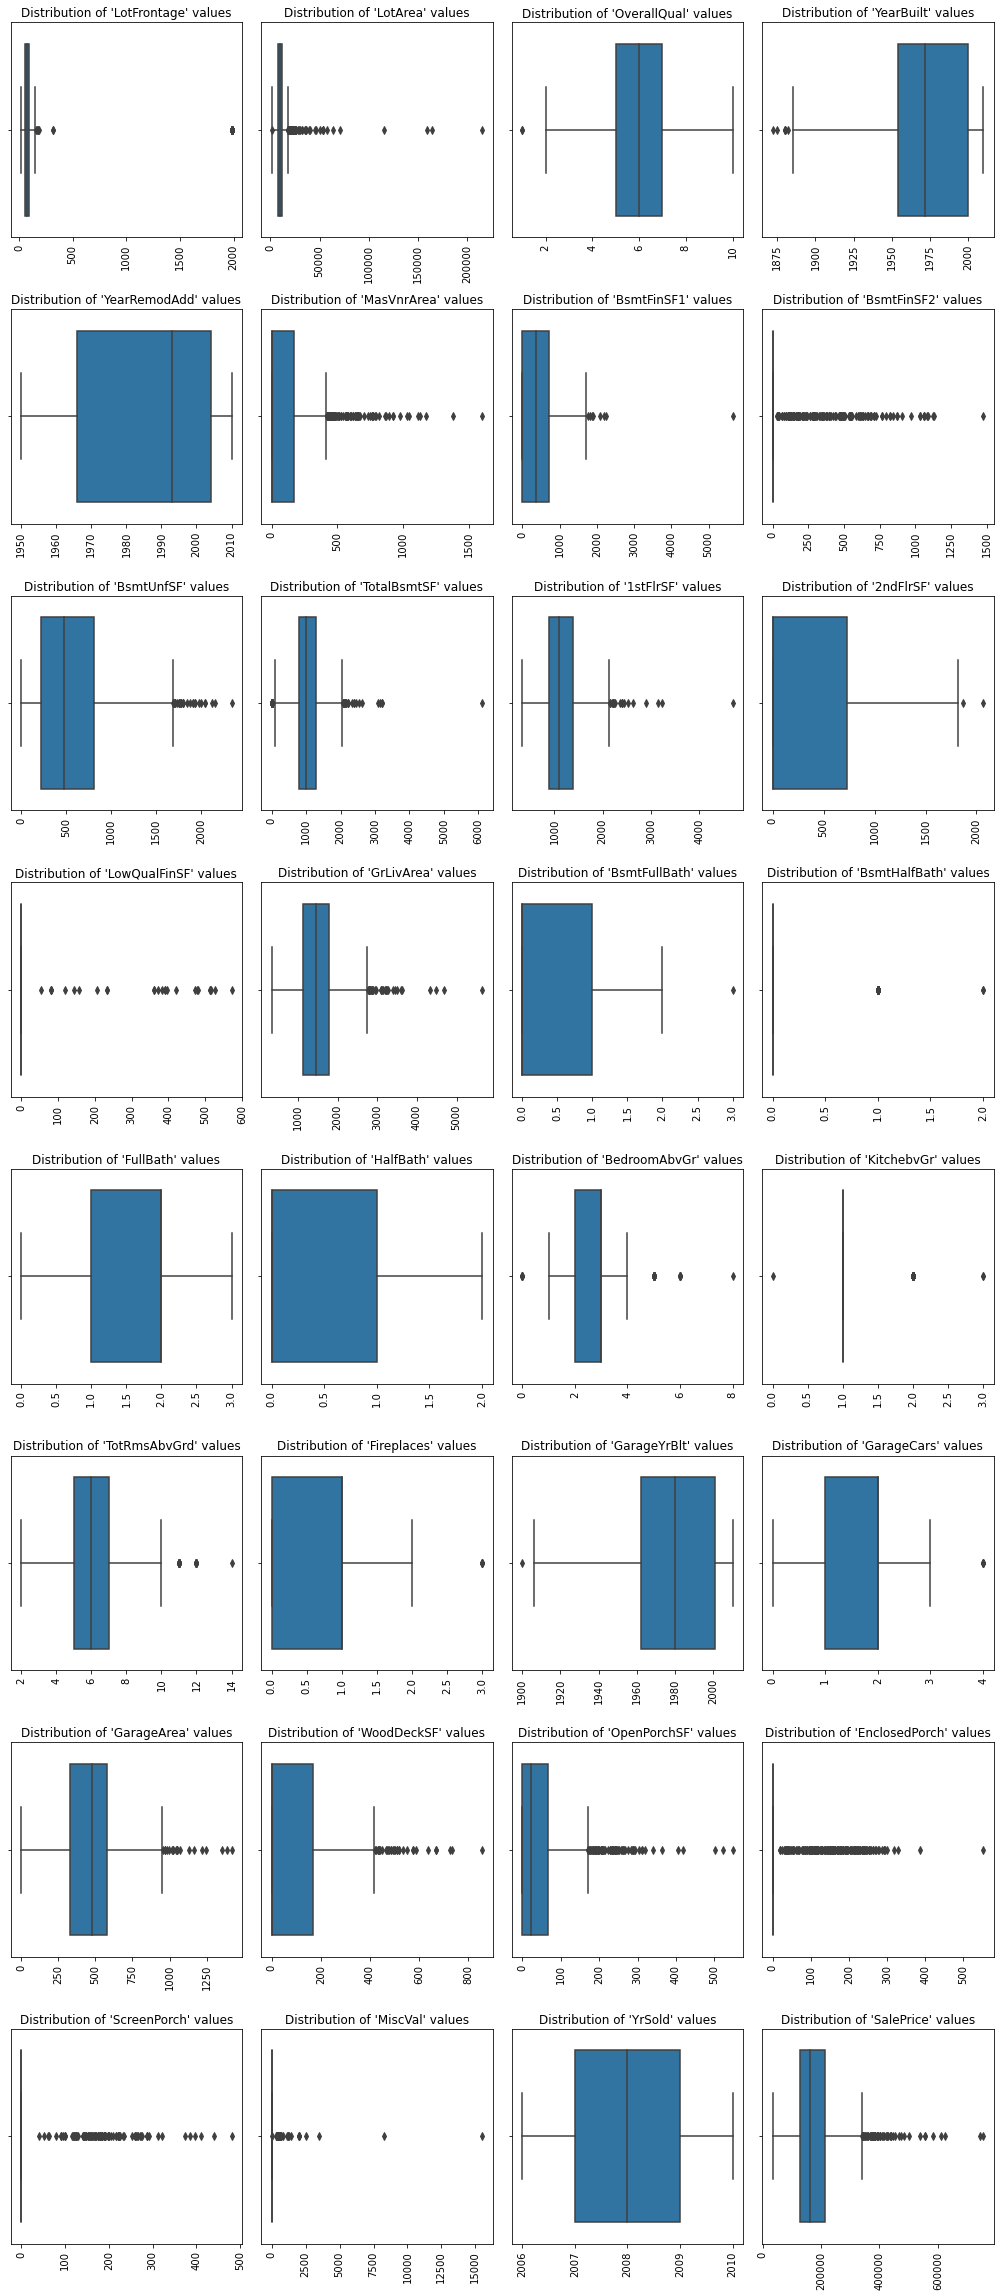

In [128]:
subplot_box(number_df, varColumns3)

### <u>6b. Discovering Outliers for One Variable</u>

#### • View outliers boxplot for any one Variable

In [129]:
# Define plot_boxplot function
def plot_boxplot(df, ft):
    sns.boxplot(x=df[ft])
    plt.show()

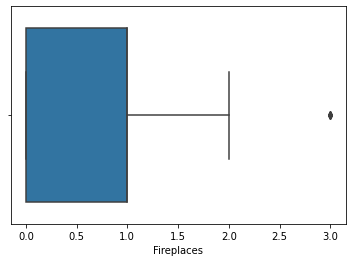

In [130]:
plot_boxplot(number_df, "Fireplaces")

<span style="color:red">**=====================================================================**</span>

## <span style="color:red">7. Removing Outliers</span>

### <span style="color:red">This is an additional section</span>
- <span style="color:red">7a. Remove/Trim Variables with Multiple Outliers</span>
- <span style="color:red">7b. Cap Multiple Variables with Outliers</span>
- <span style="color:red">7c. Remove/Trim individual Variable with Outliers</span>
- <span style="color:red">Cap Outliers for individual Variable</span>

<span style="color:red">**=====================================================================**</span>

### <u>7a. Remove/Trim Variables with Multiple Outliers</u>

#### • Function to Discovery Outlier for One Variables & store the indicies

In [131]:
# Define outliers function
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft]< lower_limit) | (df[ft]> upper_limit)]
    
    return ls


#### • Loop through all Variables with outliers and store all indicies in a list

In [132]:
# Create list to store output indicies from multiple coloumns
features = number_df.columns
index_list = []
for feature in features:
    index_list.extend(outliers(number_df, feature))
    

In [133]:
# index_list

#### • Function to  Remove/Trim all Variables with Outlier in indicies list

In [134]:
# Define function to remove outliers & return dataframe without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df



In [135]:
df_cleaned = remove(number_df, index_list)

#### • Verify that Variables with Outlier are Removed

In [136]:
number_df.shape

(1452, 32)

In [137]:
df_cleaned.shape

(550, 32)

#### • Verify trimed using subplot_box function

In [138]:
features = number_df.columns

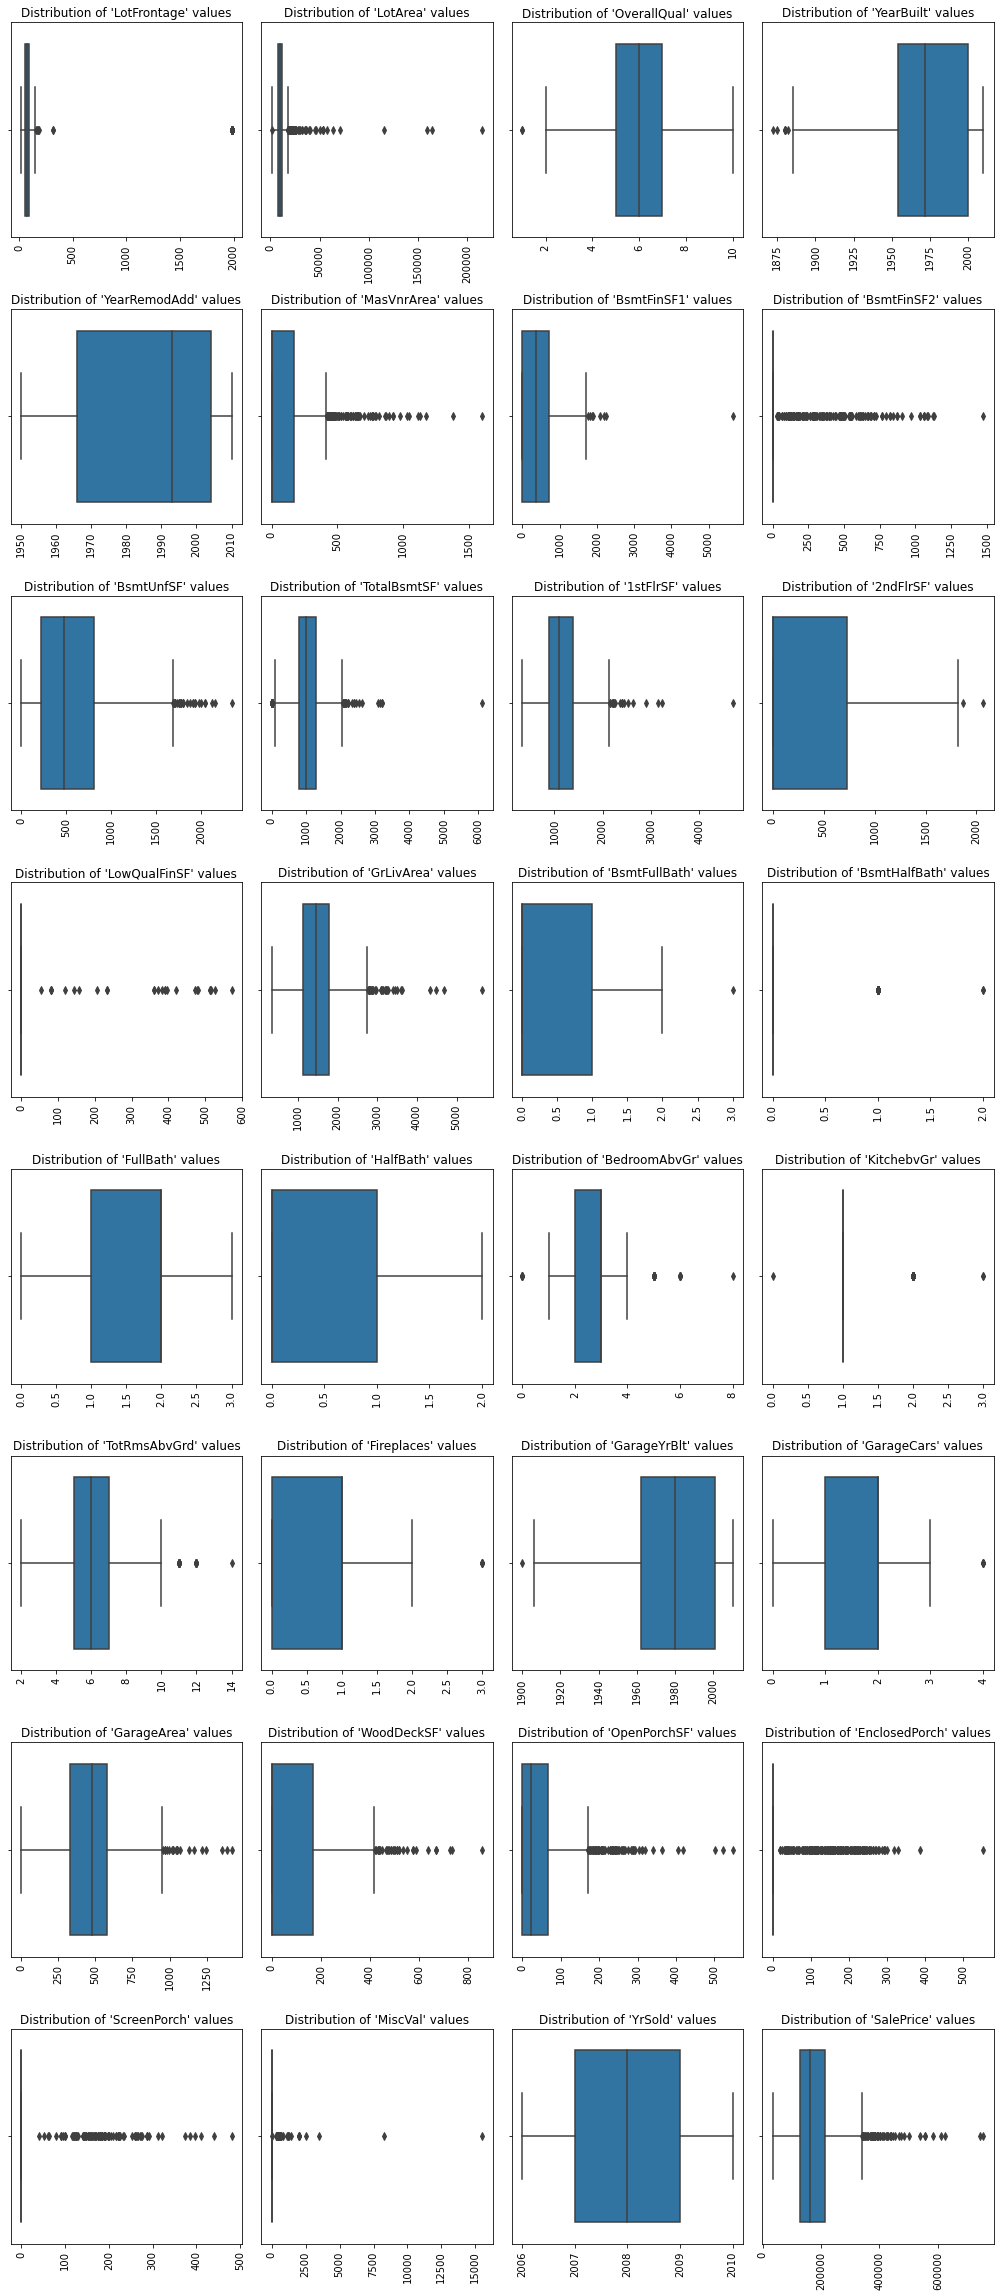

In [139]:
subplot_box(number_df, features)

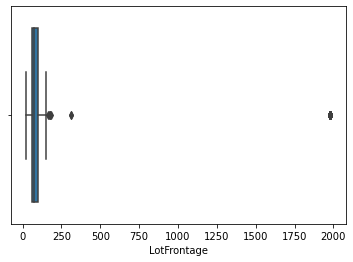

In [140]:
plot_boxplot(number_df, "LotFrontage")

In [141]:
df_cleaned.head(2)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,2008,208500
2,68.0,11250,7,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,2008,223500


### <u>7b. Cap Multiple Variables with Outliers - Upper/Lower Limits</u>

#### • Copy new DataFrame to Cap Outliers at Upper & Lower Limits

In [142]:
new_numbers2 = number_df

In [143]:
newNumCol = new_numbers2.columns

#### • Create a for loop  to Cap Variables with Outliers

In [144]:
# newNumCol = new_numbers2.columns
for col in newNumCol:
    Q1 = new_numbers2[col].quantile(0.25)
    Q3 = new_numbers2[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lo_ft = Q1 - 1.5*IQR
    up_ft = Q3 + 1.5*IQR
    
    new_numbers2[col] = np.where(new_numbers2[col]>up_ft,up_ft,
            np.where(new_numbers2[col]<lo_ft,lo_ft,new_numbers2[col]))


#### • Verify that new DataFrame is Capped of  Outliers

In [145]:
new_numbers2.shape

(1452, 32)

#### • Verify Capped using subplot_box function

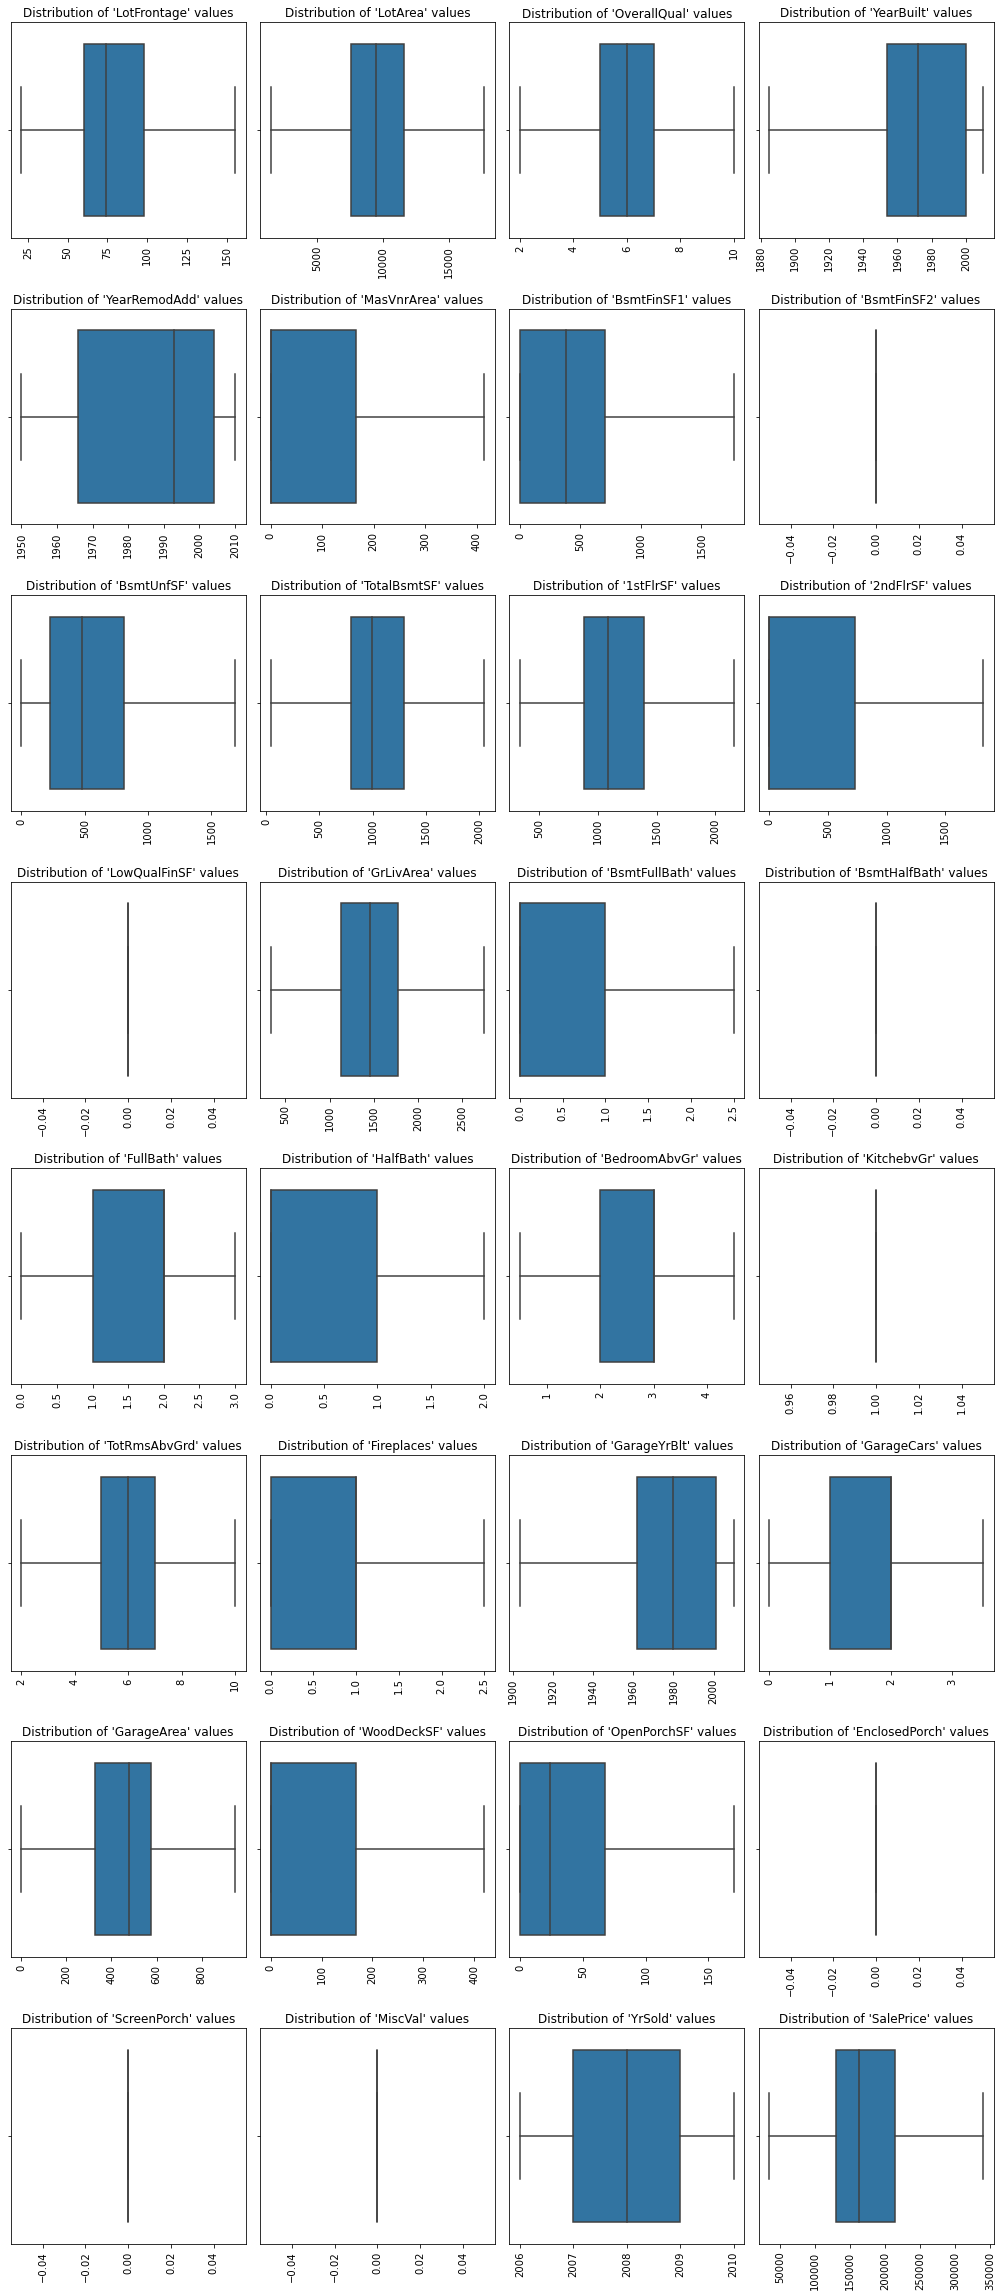

In [146]:
subplot_box(new_numbers2, newNumCol)

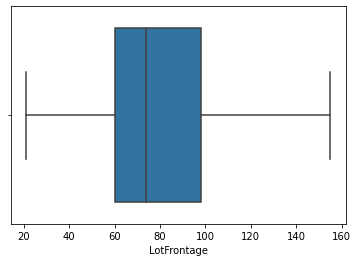

In [147]:
plot_boxplot(new_numbers2, "LotFrontage")

### <u>7c. Remove/Trim individual Variable with Outliers</u>

#### • Function to Plot outliers for Individual Variable

In [148]:
import warnings

In [149]:
def plotFeat(df,ft):
    plt.figure(figsize=(16,4))
    
    # histogram
    plt.subplot(1,2,1)
    sns.histplot(df[ft])
    
    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[ft])
    plt.show()
    

C:\Users\Tyrone\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


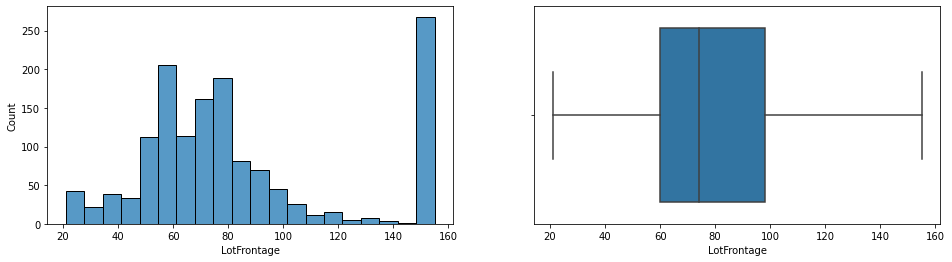

In [150]:
plotFeat(number_df, 'LotFrontage')

#### • Function to return  individaul Variable - lower_limit & upper_limit

In [151]:
# Individaul Feature lower_limit & upper_limit
def find_boundaries(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
      
    return lower_limit, upper_limit

In [152]:
lower_feat, upper_feat = find_boundaries(number_df, 'LotFrontage')

print('The lower limit is ', lower_feat)
print('The upper limit is ', upper_feat)

The lower limit is  3.0
The upper limit is  155.0


#### • Removing/triming Outliers for individual Variable

In [153]:
outlier_remove = np.where(number_df['LotFrontage']>upper_feat,True,
            np.where(number_df['LotFrontage']<lower_feat,True, False))

In [154]:
outlier_remove

array([False, False, False, ..., False, False, False])

In [155]:
number_df.shape

(1452, 32)

In [156]:
remove_data = number_df.loc[~(outlier_remove),]

In [157]:
remove_data.shape

(1452, 32)

C:\Users\Tyrone\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


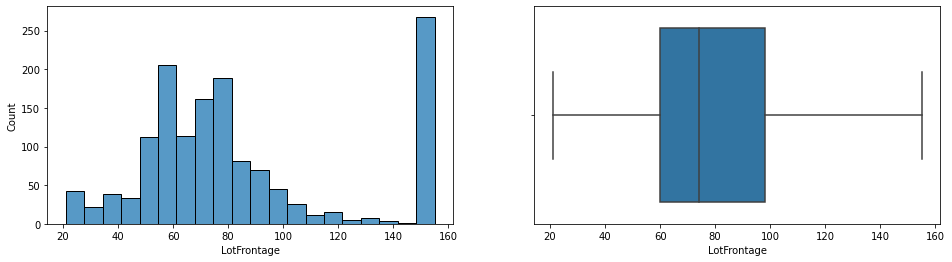

In [158]:
plotFeat(remove_data, 'LotFrontage')

### <u>7d. Cap Outliers for individual Variable</u>

#### • Capping Outliers at Upper & Lower Limits

In [159]:
number_df['LotFrontage'] = np.where(number_df['LotFrontage']>upper_feat,upper_feat,
        np.where(number_df['LotFrontage']<lower_feat,lower_feat, number_df['LotFrontage']))

#### • Verify that Outlier are Removed

In [160]:
number_df.shape

(1452, 32)

C:\Users\Tyrone\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


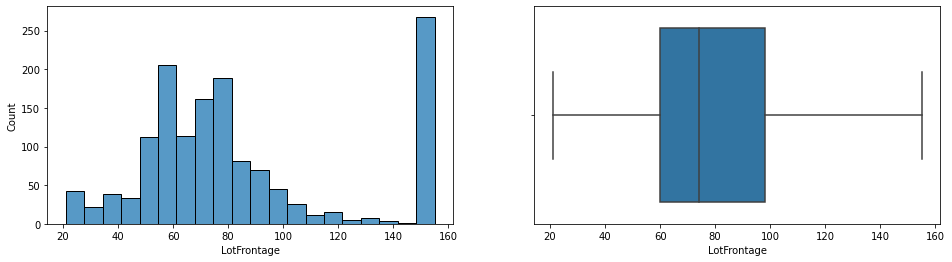

In [161]:
plotFeat(number_df, 'LotFrontage')

**=====================================================================**

Well done! You've successfully completed this project.
Evaluation Completed - Result: PASS!

Congratulations !!! Your project is evaluated and approved. Your code is nicely done and you have completed the necessary tasks for this project. Keep it up !!

**=====================================================================**